# Dataset and Domain

##### Data Dictionary

In [153]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import plot_tree
# from xgboost import XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import cross_val_score

warnings.filterwarnings(action="ignore")
%matplotlib inline

## Read the dataset

In [154]:
patient_records=pd.read_csv('Dataset.csv')
patient_records.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


### Now look at the Dataset Descriptions below:-

In [155]:
# Description=pd.read_csv('Data Dictionary.csv')
# Description.head(10)

### output variable (desired target):
 hospital_death- patient's survival outcomes lets take 0 as survive and 1 as not surive

## Let's get into Dataset

In [156]:
#checking the shape of the dataset
patient_records.shape

(91713, 186)

Note: We have 91713 records in our dataset with 186 features


In [157]:
#Exact all the column from dataset
patient_records.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [158]:
number_of_missing_values = patient_records.isna().sum().sort_values(ascending=False) 
number_of_missing_values.head(30)

h1_bilirubin_min          84619
h1_bilirubin_max          84619
h1_lactate_max            84369
h1_lactate_min            84369
h1_albumin_max            83824
h1_albumin_min            83824
h1_pao2fio2ratio_min      80195
h1_pao2fio2ratio_max      80195
h1_arterial_ph_max        76424
h1_arterial_ph_min        76424
h1_hco3_max               76094
h1_hco3_min               76094
h1_arterial_pco2_min      75959
h1_arterial_pco2_max      75959
h1_wbc_max                75953
h1_wbc_min                75953
h1_arterial_po2_max       75945
h1_arterial_po2_min       75945
h1_calcium_max            75863
h1_calcium_min            75863
h1_platelets_max          75673
h1_platelets_min          75673
h1_bun_max                75091
h1_bun_min                75091
h1_creatinine_max         74957
h1_creatinine_min         74957
h1_diasbp_invasive_min    74928
h1_diasbp_invasive_max    74928
h1_sysbp_invasive_max     74915
h1_sysbp_invasive_min     74915
dtype: int64

In [159]:
# df = pd.DataFrame(columns=["Name", "Total missing values", "Percentage of missing values"])
# for column in patient_records.columns:
#     value_counts = patient_records[column].value_counts()
#     perc = value_counts*100/patient_records.shape[0]
#     df = df.append({
#         "Name": column,
#         "Total missing values": value_counts
#     })
perc = pd.DataFrame(patient_records.isnull().sum() * 100/patient_records.shape[0], columns=["Percentage of missing values"])
value_counts = pd.DataFrame(patient_records.isnull().sum(), columns=["Total missing values"])
# pd.concat([value_counts, perc])

<AxesSubplot:>

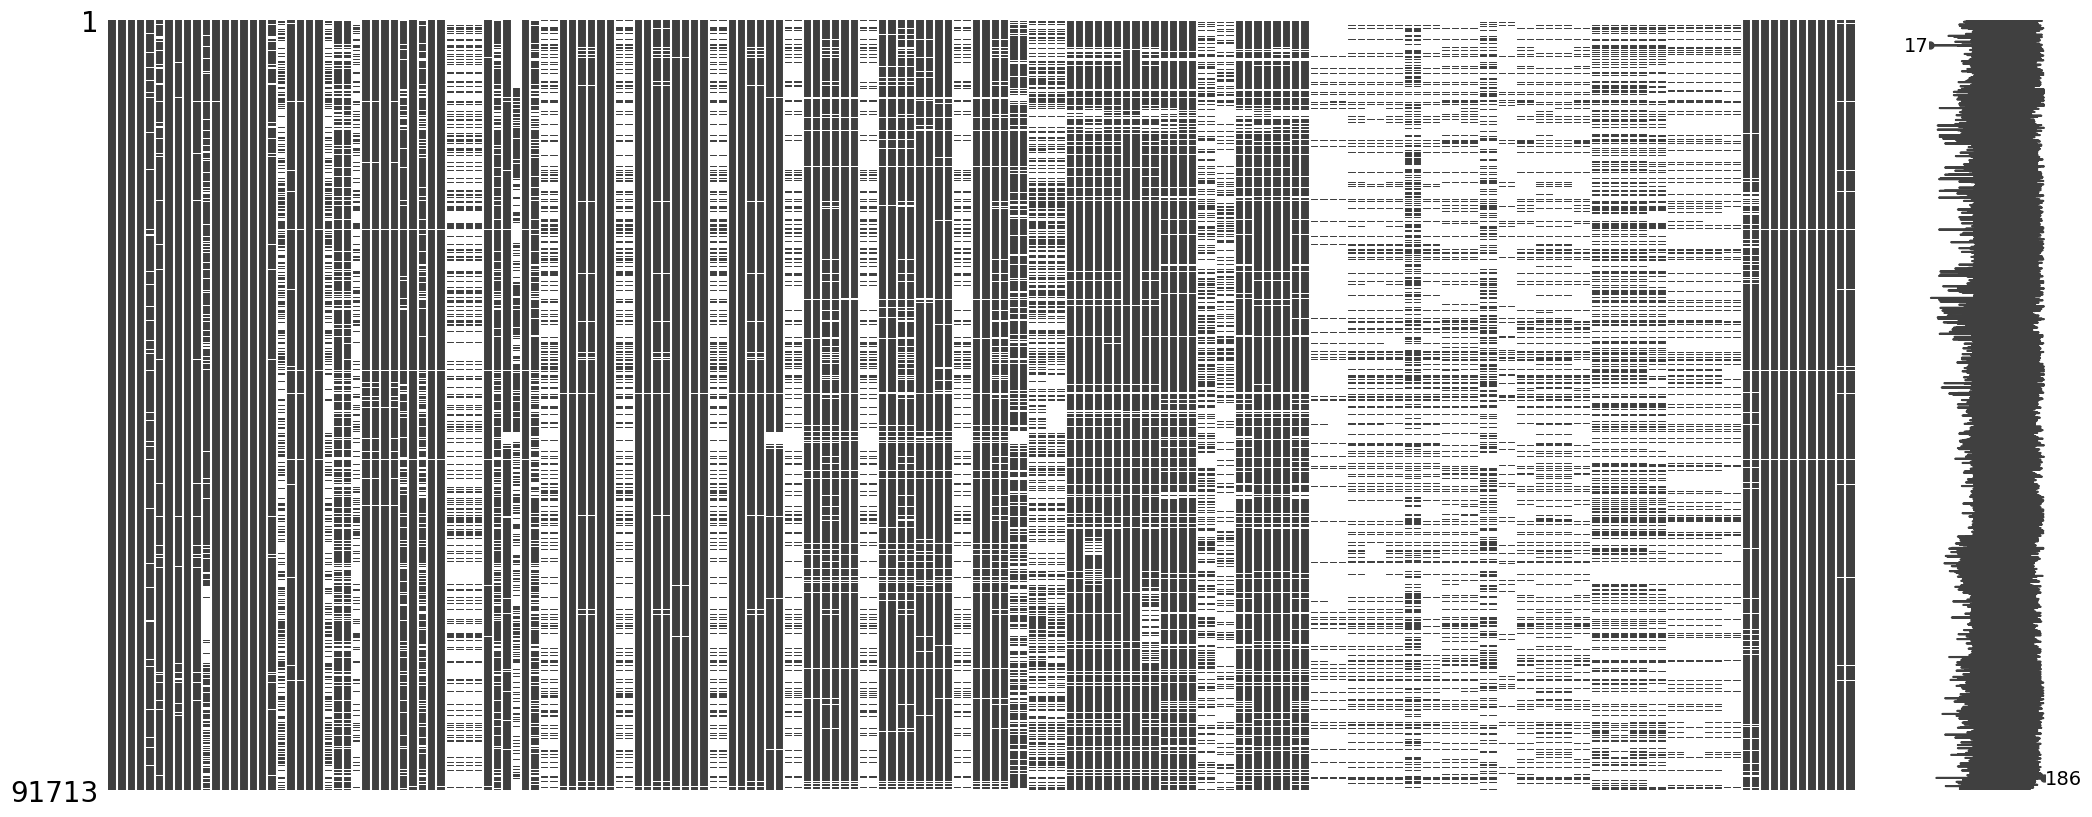

In [160]:
import missingno as msno
# !pip install missingno
msno.matrix(patient_records)

In [161]:
merged = pd.merge(left=value_counts, left_index=True, right=perc, right_index=True, how='inner')
merged.reset_index(level=0, inplace=True)
merged = merged[merged["Total missing values"] > 0]
# merged.to_excel("missing_values.xlsx")
# sns.heatmap(merged.isnull())
# sns.heatmap()
# merged.plot(kind="bar")
merged.rename(columns = {'index':'Attribute'}, inplace = True)

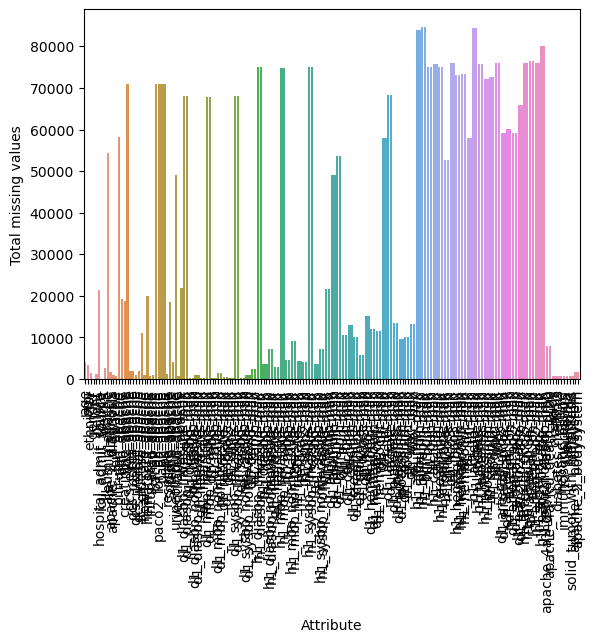

In [162]:
plt.figure.figsize = (26, 20)
# merged.plot(kind="bar", x="Attribute", y="Total missing values")
sns.barplot(x="Attribute", y="Total missing values", data=merged)
plt.xticks(rotation=90)
plt.show()

## Variable Categorization

In [163]:
#let's get in to the data information with datatypes
patient_records.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [164]:
#Let us check out the individual data types
# dtype = pd.DataFrame(patient_records.dtypes, columns=["DataType"])
# dtype = dtype.reset_index()
# dtype.reset_index(level=0, inplace=True)
# dtype.rename(columns = {'index':'Attributes'}, inplace = True)
patient_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


### lets check for the different data type
binary_variable

In [165]:
binary_variables = [
    "hospital_death", 
    "elective_surgery", 
    "readmission_status", 
    "apache_post_operative", 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]

In [166]:
patient_records[binary_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               91713 non-null  int64  
 1   elective_surgery             91713 non-null  int64  
 2   readmission_status           91713 non-null  int64  
 3   apache_post_operative        91713 non-null  int64  
 4   arf_apache                   90998 non-null  float64
 5   gcs_unable_apache            90676 non-null  float64
 6   intubated_apache             90998 non-null  float64
 7   ventilated_apache            90998 non-null  float64
 8   aids                         90998 non-null  float64
 9   cirrhosis                    90998 non-null  float64
 10  diabetes_mellitus            90998 non-null  float64
 11  hepatic_failure              90998 non-null  float64
 12  immunosuppression            90998 non-null  float64
 13  leukemia        

In [167]:
patient_records[binary_variables].nunique()

hospital_death                 2
elective_surgery               2
readmission_status             1
apache_post_operative          2
arf_apache                     2
gcs_unable_apache              2
intubated_apache               2
ventilated_apache              2
aids                           2
cirrhosis                      2
diabetes_mellitus              2
hepatic_failure                2
immunosuppression              2
leukemia                       2
lymphoma                       2
solid_tumor_with_metastasis    2
dtype: int64

#### Now look for the missing values

In [168]:
patient_records[binary_variables].isnull().sum() * 100 / patient_records[binary_variables].shape[0]

hospital_death                 0.000000
elective_surgery               0.000000
readmission_status             0.000000
apache_post_operative          0.000000
arf_apache                     0.779606
gcs_unable_apache              1.130701
intubated_apache               0.779606
ventilated_apache              0.779606
aids                           0.779606
cirrhosis                      0.779606
diabetes_mellitus              0.779606
hepatic_failure                0.779606
immunosuppression              0.779606
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
dtype: float64

some columns containing the missing values

In [169]:
to_convert_variables = [ 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]
# patient_records["arf_apache"] = patient_records["arf_apache"].fillna(patient_records["arf_apache"].mode())
for var in to_convert_variables:
    print(var)
    print(patient_records[var].mode())

arf_apache
0    0.0
Name: arf_apache, dtype: float64
gcs_unable_apache
0    0.0
Name: gcs_unable_apache, dtype: float64
intubated_apache
0    0.0
Name: intubated_apache, dtype: float64
ventilated_apache
0    0.0
Name: ventilated_apache, dtype: float64
aids
0    0.0
Name: aids, dtype: float64
cirrhosis
0    0.0
Name: cirrhosis, dtype: float64
diabetes_mellitus
0    0.0
Name: diabetes_mellitus, dtype: float64
hepatic_failure
0    0.0
Name: hepatic_failure, dtype: float64
immunosuppression
0    0.0
Name: immunosuppression, dtype: float64
leukemia
0    0.0
Name: leukemia, dtype: float64
lymphoma
0    0.0
Name: lymphoma, dtype: float64
solid_tumor_with_metastasis
0    0.0
Name: solid_tumor_with_metastasis, dtype: float64


#### fill null values

In [170]:
patient_records[to_convert_variables] = patient_records[to_convert_variables].fillna(0.0)

In [171]:
patient_records[to_convert_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arf_apache                   91713 non-null  float64
 1   gcs_unable_apache            91713 non-null  float64
 2   intubated_apache             91713 non-null  float64
 3   ventilated_apache            91713 non-null  float64
 4   aids                         91713 non-null  float64
 5   cirrhosis                    91713 non-null  float64
 6   diabetes_mellitus            91713 non-null  float64
 7   hepatic_failure              91713 non-null  float64
 8   immunosuppression            91713 non-null  float64
 9   leukemia                     91713 non-null  float64
 10  lymphoma                     91713 non-null  float64
 11  solid_tumor_with_metastasis  91713 non-null  float64
dtypes: float64(12)
memory usage: 8.4 MB


In [172]:
# patient_records["arf_apache"].astype(np.int64)
patient_records['arf_apache'] = patient_records['arf_apache'].apply(np.int64)
patient_records['gcs_unable_apache'] = patient_records['gcs_unable_apache'].apply(np.int64)
patient_records['intubated_apache'] = patient_records['intubated_apache'].apply(np.int64)
patient_records['ventilated_apache'] = patient_records['ventilated_apache'].apply(np.int64)
patient_records['aids'] = patient_records['aids'].apply(np.int64)
patient_records['cirrhosis'] = patient_records['cirrhosis'].apply(np.int64)
patient_records['diabetes_mellitus'] = patient_records['diabetes_mellitus'].apply(np.int64)
patient_records['hepatic_failure'] = patient_records['hepatic_failure'].apply(np.int64)
patient_records['immunosuppression'] = patient_records['immunosuppression'].apply(np.int64)
patient_records['leukemia'] = patient_records['leukemia'].apply(np.int64)
patient_records['lymphoma'] = patient_records['lymphoma'].apply(np.int64)
patient_records['solid_tumor_with_metastasis'] = patient_records['solid_tumor_with_metastasis'].apply(np.int64)
patient_records[binary_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   hospital_death               91713 non-null  int64
 1   elective_surgery             91713 non-null  int64
 2   readmission_status           91713 non-null  int64
 3   apache_post_operative        91713 non-null  int64
 4   arf_apache                   91713 non-null  int64
 5   gcs_unable_apache            91713 non-null  int64
 6   intubated_apache             91713 non-null  int64
 7   ventilated_apache            91713 non-null  int64
 8   aids                         91713 non-null  int64
 9   cirrhosis                    91713 non-null  int64
 10  diabetes_mellitus            91713 non-null  int64
 11  hepatic_failure              91713 non-null  int64
 12  immunosuppression            91713 non-null  int64
 13  leukemia                     91713 non-null  i

In [173]:
patient_records.drop(["apache_post_operative"], axis=1, inplace=True)

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- We can see that the target variable hospital death is of binary type. It also does not contain any null values. Thus no furthur nmodifications required for the target variable.<br>
- Checking the null values, it is seen that only around 0.7 - 1 % of values are missing. Hence they are not dropped.<br>
- But dropping feature apache_post_operative
- Using mode, adding the missing values. Converting all to int type
</div>

## catergorical variable
which containing the object type

In [174]:
#as by default our target variable is a numerical data we will change our datatype to categorical 
patient_records['hospital_death']=patient_records['hospital_death'].astype('object')

In [175]:
patient_catgeorical = patient_records.select_dtypes(object)

In [176]:
patient_catgeorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   hospital_death         91713 non-null  object
 1   ethnicity              90318 non-null  object
 2   gender                 91688 non-null  object
 3   hospital_admit_source  70304 non-null  object
 4   icu_admit_source       91601 non-null  object
 5   icu_stay_type          91713 non-null  object
 6   icu_type               91713 non-null  object
 7   apache_3j_bodysystem   90051 non-null  object
 8   apache_2_bodysystem    90051 non-null  object
dtypes: object(9)
memory usage: 6.3+ MB


In [177]:
patient_catgeorical.nunique()

hospital_death            2
ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
apache_3j_bodysystem     11
apache_2_bodysystem      10
dtype: int64

#### Removing the missing values

In [178]:
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

hospital_death            0.000000
ethnicity                 1.521049
gender                    0.027259
hospital_admit_source    23.343474
icu_admit_source          0.122120
icu_stay_type             0.000000
icu_type                  0.000000
apache_3j_bodysystem      1.812175
apache_2_bodysystem       1.812175
dtype: float64

In [179]:
for var in ["gender", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(var)
    print(patient_records[var].mode())

gender
0    M
Name: gender, dtype: object
apache_3j_bodysystem
0    Cardiovascular
Name: apache_3j_bodysystem, dtype: object
apache_2_bodysystem
0    Cardiovascular
Name: apache_2_bodysystem, dtype: object
ethnicity
0    Caucasian
Name: ethnicity, dtype: object
hospital_admit_source
0    Emergency Department
Name: hospital_admit_source, dtype: object
icu_admit_source
0    Accident & Emergency
Name: icu_admit_source, dtype: object


In [180]:
patient_records["gender"] = patient_records["gender"].fillna("M")
patient_records["apache_3j_bodysystem"] = patient_records["apache_3j_bodysystem"].fillna("Cardiovascular")
patient_records["apache_2_bodysystem"] = patient_records["apache_2_bodysystem"].fillna("Cardiovascular")
patient_records["ethnicity"] = patient_records["ethnicity"].fillna("Caucasian")
patient_records["hospital_admit_source"] = patient_records["hospital_admit_source"].fillna("Floor")
patient_records["icu_admit_source"] = patient_records["icu_admit_source"].fillna("Floor")

In [181]:
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(patient_records[var].value_counts())

M    49494
F    42219
Name: gender, dtype: int64
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64
Caucasian           72079
African American   

In [182]:
patient_records.apache_2_bodysystem.replace({"Undefined diagnoses": "Undefined Diagnoses"}, inplace=True)
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem"]:
    print(patient_records[var].value_counts())

M    49494
F    42219
Name: gender, dtype: int64
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Undefined Diagnoses     4114
Trauma                  3842
Renal/Genitourinary     2460
Haematologic             638
Name: apache_2_bodysystem, dtype: int64


In [183]:
patient_catgeorical = patient_records.select_dtypes(object)
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

hospital_death           0.0
ethnicity                0.0
gender                   0.0
hospital_admit_source    0.0
icu_admit_source         0.0
icu_stay_type            0.0
icu_type                 0.0
apache_3j_bodysystem     0.0
apache_2_bodysystem      0.0
dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are our categorical variables with many categories.<br>
- We have found count of categories for each feature.<br>
- Checking the null values, it is seen that only around 1.5 - 24 % of values are missing.<br>
- From the information, other than gender, icu_type and APACHE bodysystem, the other features .
</div>

In [184]:
patient_records.shape

(91713, 185)

### Discrete variables containing columns

In [185]:
integer_variables = [
    "encounter_id", 
    "hospital_id", 
    "patient_id", 
    "icu_id", 
    "gcs_eyes_apache", 
    "gcs_motor_apache", 
    "gcs_verbal_apache", 
]

In [186]:
patient_discrete = patient_records[integer_variables]

In [187]:
patient_discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   encounter_id       91713 non-null  int64  
 1   hospital_id        91713 non-null  int64  
 2   patient_id         91713 non-null  int64  
 3   icu_id             91713 non-null  int64  
 4   gcs_eyes_apache    89812 non-null  float64
 5   gcs_motor_apache   89812 non-null  float64
 6   gcs_verbal_apache  89812 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 4.9 MB


In [188]:
patient_discrete.nunique()

encounter_id         91713
hospital_id            147
patient_id           91713
icu_id                 241
gcs_eyes_apache          4
gcs_motor_apache         6
gcs_verbal_apache        5
dtype: int64

### Missing Values

In [189]:
patient_discrete.isnull().sum() * 100 / patient_discrete.shape[0]

encounter_id         0.00000
hospital_id          0.00000
patient_id           0.00000
icu_id               0.00000
gcs_eyes_apache      2.07277
gcs_motor_apache     2.07277
gcs_verbal_apache    2.07277
dtype: float64

In [190]:
patient_discrete["gcs_motor_apache"].value_counts()

6.0    70960
5.0     7982
1.0     5543
4.0     4494
3.0      524
2.0      309
Name: gcs_motor_apache, dtype: int64

In [191]:
patient_discrete["gcs_eyes_apache"].value_counts()

4.0    62995
3.0    13863
1.0     8274
2.0     4680
Name: gcs_eyes_apache, dtype: int64

In [192]:
patient_discrete["gcs_verbal_apache"].value_counts()

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
Name: gcs_verbal_apache, dtype: int64

#### Lets drop some column which doesnt show any relation with other column

In [193]:
patient_records.drop(["encounter_id", "hospital_id", "icu_id", "patient_id"], axis=1, inplace=True)

In [194]:
for var in ['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']:
    print(var)
    print(patient_records[var].mode())

gcs_motor_apache
0    6.0
Name: gcs_motor_apache, dtype: float64
gcs_eyes_apache
0    4.0
Name: gcs_eyes_apache, dtype: float64
gcs_verbal_apache
0    5.0
Name: gcs_verbal_apache, dtype: float64


### fill null values

In [195]:
patient_records["gcs_motor_apache"] = patient_records["gcs_motor_apache"].fillna(6)
patient_records["gcs_eyes_apache"] = patient_records["gcs_eyes_apache"].fillna(4)
patient_records["gcs_verbal_apache"] = patient_records["gcs_verbal_apache"].fillna(5)

In [196]:
patient_records['gcs_motor_apache'] = patient_records['gcs_motor_apache'].apply(np.int64)
patient_records['gcs_eyes_apache'] = patient_records['gcs_eyes_apache'].apply(np.int64)
patient_records['gcs_verbal_apache'] = patient_records['gcs_verbal_apache'].apply(np.int64)

In [197]:
patient_records[['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gcs_motor_apache   91713 non-null  int64
 1   gcs_eyes_apache    91713 non-null  int64
 2   gcs_verbal_apache  91713 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are our discrete variables.<br>
- From the information, the ids such as patient_id, hospital_id, icu_id, encounter_id do not seem to contribute to the cause of death at the hospital., Thus we can drop these columns<br>
- The APACHE readings in this list seem to be discrete but in a categorical manner. Hence it will be added to the category variable with many categories.
</div>

In [198]:
patient_records.shape

(91713, 181)

### Now look for the Continous numeric variables

In [199]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

,age,bmi,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,bilirubin_apache,bun_apache,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,0.541667,73.9,2.3,113.0,502.01,0.4,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05
1,77.0,27.42,160.0,0.927778,70.2,NaN,108.0,203.01,NaN,9.0,...,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29
2,25.0,31.95,172.7,0.000694,95.3,NaN,122.0,703.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,0.000694,61.7,NaN,203.0,1206.03,NaN,NaN,...,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03
4,19.0,NaN,188.0,0.073611,NaN,NaN,119.0,601.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 155 entries, age to apache_4a_icu_death_prob
dtypes: float64(155)
memory usage: 108.5 MB


In [201]:
hour_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("h1")]
len(hour_basis_readings)

64

#### looking for the patients with hour basis reading

In [202]:
patient_continuous[hour_basis_readings].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1_diasbp_invasive_max     16785 non-null  float64
 1   h1_diasbp_invasive_min     16785 non-null  float64
 2   h1_diasbp_max              88094 non-null  float64
 3   h1_diasbp_min              88094 non-null  float64
 4   h1_diasbp_noninvasive_max  84363 non-null  float64
 5   h1_diasbp_noninvasive_min  84363 non-null  float64
 6   h1_heartrate_max           88923 non-null  float64
 7   h1_heartrate_min           88923 non-null  float64
 8   h1_mbp_invasive_max        16869 non-null  float64
 9   h1_mbp_invasive_min        16869 non-null  float64
 10  h1_mbp_max                 87074 non-null  float64
 11  h1_mbp_min                 87074 non-null  float64
 12  h1_mbp_noninvasive_max     82629 non-null  float64
 13  h1_mbp_noninvasive_min     82629 non-null  flo

In [203]:
patient_continuous[hour_basis_readings].isnull().sum() * 100 / patient_continuous[hour_basis_readings].shape[0]

h1_diasbp_invasive_max       81.698342
h1_diasbp_invasive_min       81.698342
h1_diasbp_max                 3.946005
h1_diasbp_min                 3.946005
h1_diasbp_noninvasive_max     8.014131
                               ...    
h1_arterial_ph_min           83.329517
h1_arterial_po2_max          82.807236
h1_arterial_po2_min          82.807236
h1_pao2fio2ratio_max         87.441257
h1_pao2fio2ratio_min         87.441257
Length: 64, dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are the observations within 24 hours<br>
- Most of these have null values, and do not seem to give any contributions to the hospital death analysis. Hence dropped.
</div>

#### Now look for the patients with day basis reading

In [204]:
day_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("d1")]
len(day_basis_readings)

64

In [205]:
patient_continuous[day_basis_readings].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   d1_diasbp_invasive_max     23729 non-null  float64
 1   d1_diasbp_invasive_min     23729 non-null  float64
 2   d1_diasbp_max              91548 non-null  float64
 3   d1_diasbp_min              91548 non-null  float64
 4   d1_diasbp_noninvasive_max  90673 non-null  float64
 5   d1_diasbp_noninvasive_min  90673 non-null  float64
 6   d1_heartrate_max           91568 non-null  float64
 7   d1_heartrate_min           91568 non-null  float64
 8   d1_mbp_invasive_max        23936 non-null  float64
 9   d1_mbp_invasive_min        23936 non-null  float64
 10  d1_mbp_max                 91493 non-null  float64
 11  d1_mbp_min                 91493 non-null  float64
 12  d1_mbp_noninvasive_max     90234 non-null  float64
 13  d1_mbp_noninvasive_min     90234 non-null  flo

In [206]:
patient_continuous[day_basis_readings].isnull().sum() * 100 / patient_continuous[day_basis_readings].shape[0]

d1_diasbp_invasive_max       74.126896
d1_diasbp_invasive_min       74.126896
d1_diasbp_max                 0.179909
d1_diasbp_min                 0.179909
d1_diasbp_noninvasive_max     1.133972
                               ...    
d1_arterial_ph_min           65.555592
d1_arterial_po2_max          64.616794
d1_arterial_po2_min          64.616794
d1_pao2fio2ratio_max         71.972349
d1_pao2fio2ratio_min         71.972349
Length: 64, dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are the observations within 1 day<br>
- Most of these have null values, and do not seem to give any contributions to the hospital death analysis. Hence dropped.
</div>

In [207]:
patient_records.drop(hour_basis_readings, axis=1, inplace=True)

In [208]:
patient_records.drop(day_basis_readings, axis=1, inplace=True)

In [209]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

,age,bmi,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,bilirubin_apache,bun_apache,...,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,0.541667,73.9,2.3,113.0,502.01,0.4,31.0,...,NaN,NaN,NaN,36.0,134.0,39.3,NaN,14.1,0.10,0.05
1,77.0,27.42,160.0,0.927778,70.2,NaN,108.0,203.01,NaN,9.0,...,37.0,51.0,7.45,33.0,145.0,35.1,NaN,12.7,0.47,0.29
2,25.0,31.95,172.7,0.000694,95.3,NaN,122.0,703.03,NaN,NaN,...,NaN,NaN,NaN,37.0,NaN,36.7,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,0.000694,61.7,NaN,203.0,1206.03,NaN,NaN,...,30.0,142.0,7.39,4.0,NaN,34.8,NaN,8.0,0.04,0.03
4,19.0,NaN,188.0,0.073611,NaN,NaN,119.0,601.01,NaN,NaN,...,NaN,NaN,NaN,16.0,NaN,36.7,NaN,NaN,NaN,NaN


In [210]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   height                         90379 non-null  float64
 3   pre_icu_los_days               91713 non-null  float64
 4   weight                         88993 non-null  float64
 5   albumin_apache                 37334 non-null  float64
 6   apache_2_diagnosis             90051 non-null  float64
 7   apache_3j_diagnosis            90612 non-null  float64
 8   bilirubin_apache               33579 non-null  float64
 9   bun_apache                     72451 non-null  float64
 10  creatinine_apache              72860 non-null  float64
 11  fio2_apache                    20845 non-null  float64
 12  glucose_apache                 80677 non-null 

#### Dealing with the missing values

In [211]:
patient_continuous.isnull().sum() * 100 / patient_continuous.shape[0]

age                               4.610033
bmi                               3.738837
height                            1.454538
pre_icu_los_days                  0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
fio2_apache                      77.271488
glucose_apache                   12.033190
heart_rate_apache                 0.957334
hematocrit_apache                21.674136
map_apache                        1.083816
paco2_apache                     77.271488
paco2_for_ph_apache              77.271488
pao2_apache                      77.271488
ph_apache                        77.271488
resprate_apache                   1.345502
sodium_apache                    20.280658
temp_apache                       4.479191
urineoutput

In [212]:
to_remove = ["albumin_apache", "bilirubin_apache", "fio2_apache", "paco2_apache", "paco2_for_ph_apache", "pao2_apache", "ph_apache", "urineoutput_apache"]
patient_records.drop(to_remove, axis=1, inplace=True)

In [213]:
patient_records.drop("pre_icu_los_days", axis=1, inplace=True)

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- The columns with more than 50% of missing values are dropped.<br>
- The columns pre_icu_los_days is also dropped as we felt its not required.
</div>

In [214]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,73.9,113.0,502.01,31.0,2.51,168.0,118.0,27.4,40.0,36.0,134.0,39.3,14.1,0.10,0.05
1,77.0,27.42,160.0,70.2,108.0,203.01,9.0,0.56,145.0,120.0,36.9,46.0,33.0,145.0,35.1,12.7,0.47,0.29
2,25.0,31.95,172.7,95.3,122.0,703.03,NaN,NaN,NaN,102.0,NaN,68.0,37.0,NaN,36.7,NaN,0.00,0.00
3,81.0,22.64,165.1,61.7,203.0,1206.03,NaN,NaN,185.0,114.0,25.9,60.0,4.0,NaN,34.8,8.0,0.04,0.03
4,19.0,NaN,188.0,NaN,119.0,601.01,NaN,NaN,NaN,60.0,NaN,103.0,16.0,NaN,36.7,NaN,NaN,NaN


In [215]:
patient_continuous.describe()

,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,87485.000000,88284.000000,90379.000000,88993.000000,90051.000000,90612.000000,72451.00000,72860.000000,80677.000000,90835.000000,71835.000000,90719.000000,90479.000000,73113.000000,87605.000000,69701.000000,83766.000000,83766.000000
mean,62.309516,29.185818,169.641588,84.028340,185.401739,558.216377,25.82533,1.480014,160.326822,99.707932,32.988739,88.015873,25.811007,137.966373,36.414472,12.133333,0.086787,0.043955
std,16.775119,8.275142,10.795378,25.011497,86.050882,463.266985,20.67298,1.525787,90.790551,30.870502,6.873585,42.032412,15.106312,5.279418,0.833496,6.917984,0.247569,0.217341
min,16.000000,14.844926,137.200000,38.600000,101.000000,0.010000,4.00000,0.300000,39.000000,30.000000,16.200000,40.000000,4.000000,117.000000,32.100000,0.900000,-1.000000,-1.000000
25%,52.000000,23.641975,162.500000,66.800000,113.000000,203.010000,13.00000,0.720000,97.000000,86.000000,28.000000,54.000000,11.000000,135.000000,36.200000,7.500000,0.020000,0.010000
50%,65.000000,27.654655,170.100000,80.300000,122.000000,409.020000,19.00000,0.980000,133.000000,104.000000,33.200000,67.000000,28.000000,138.000000,36.500000,10.400000,0.050000,0.020000
75%,75.000000,32.930206,177.800000,97.100000,301.000000,703.030000,32.00000,1.530000,196.000000,120.000000,37.900000,125.000000,36.000000,141.000000,36.700000,15.100000,0.130000,0.060000
max,89.000000,67.814990,195.590000,186.000000,308.000000,2201.050000,127.00000,11.180000,598.700000,178.000000,51.400000,200.000000,60.000000,158.000000,39.700000,45.800000,0.990000,0.970000


<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- Do not see any irregularites in observations, mainly for age, bmi, height, and weight. The minimum values do not have 0, so we can assume that even with null values, the observations are correct<br>
</div>

#### lets check it by skewness

In [216]:
patient_continuous.skew()

age                             -0.624474
bmi                              1.440833
height                          -0.101455
weight                           1.069070
apache_2_diagnosis               0.507410
apache_3j_diagnosis              1.013397
bun_apache                       2.129075
creatinine_apache                3.546544
glucose_apache                   1.842239
heart_rate_apache               -0.267300
hematocrit_apache               -0.000793
map_apache                       0.698319
resprate_apache                  0.258494
sodium_apache                   -0.292819
temp_apache                     -0.966299
wbc_apache                       1.678508
apache_4a_hospital_death_prob   -1.484047
apache_4a_icu_death_prob        -2.028836
dtype: float64

In [217]:
len(patient_continuous.columns)

18

In [218]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   height                         90379 non-null  float64
 3   weight                         88993 non-null  float64
 4   apache_2_diagnosis             90051 non-null  float64
 5   apache_3j_diagnosis            90612 non-null  float64
 6   bun_apache                     72451 non-null  float64
 7   creatinine_apache              72860 non-null  float64
 8   glucose_apache                 80677 non-null  float64
 9   heart_rate_apache              90835 non-null  float64
 10  hematocrit_apache              71835 non-null  float64
 11  map_apache                     90719 non-null  float64
 12  resprate_apache                90479 non-null 

#### fill the null values

#### Skewed Variable

age, bmi, weight, apache_2_diagnosis, apache_3j_diagnosis, bun_apache, creatinine_apache, glucose_apache, map_apache, temp_apache, wbc_apache, apache_4a_hospital_death_prob, apache_4a_icu_death_prob


#### Symmetric Variables

height, heart_rate_apache, hematocrit_apache, resprate_apache, sodium_apache

In [219]:
convert_median = ["age", "bmi", "weight", "apache_2_diagnosis", "apache_3j_diagnosis", "bun_apache", 
                  "creatinine_apache", "glucose_apache", "map_apache", "temp_apache", "wbc_apache", 
                  "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].median(), inplace=True)

age
bmi
weight
apache_2_diagnosis
apache_3j_diagnosis
bun_apache
creatinine_apache
glucose_apache
map_apache
temp_apache
wbc_apache
apache_4a_hospital_death_prob
apache_4a_icu_death_prob


In [220]:
convert_median = ["height", "heart_rate_apache", "hematocrit_apache", "resprate_apache", "sodium_apache"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].mean(), inplace=True)

height
heart_rate_apache
hematocrit_apache
resprate_apache
sodium_apache


In [221]:
patient_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  object 
 1   age                            91713 non-null  float64
 2   bmi                            91713 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      91713 non-null  object 
 5   gender                         91713 non-null  object 
 6   height                         91713 non-null  float64
 7   hospital_admit_source          91713 non-null  object 
 8   icu_admit_source               91713 non-null  object 
 9   icu_stay_type                  91713 non-null  object 
 10  icu_type                       91713 non-null  object 
 11  readmission_status             91713 non-null  int64  
 12  weight                         91713 non-null 

### AFTER CLEANING THE DATASET BY REMOVING NULL VALUE

In [222]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=patient_records.select_dtypes(object)
print(df_categorical.head())

  hospital_death  ethnicity gender hospital_admit_source  \
0              0  Caucasian      M                 Floor   
1              0  Caucasian      F                 Floor   
2              0  Caucasian      F  Emergency Department   
3              0  Caucasian      F        Operating Room   
4              0  Caucasian      M                 Floor   

            icu_admit_source icu_stay_type      icu_type apache_3j_bodysystem  \
0                      Floor         admit         CTICU               Sepsis   
1                      Floor         admit  Med-Surg ICU          Respiratory   
2       Accident & Emergency         admit  Med-Surg ICU            Metabolic   
3  Operating Room / Recovery         admit         CTICU       Cardiovascular   
4       Accident & Emergency         admit  Med-Surg ICU               Trauma   

  apache_2_bodysystem  
0      Cardiovascular  
1         Respiratory  
2           Metabolic  
3      Cardiovascular  
4              Trauma  


In [223]:
patient_records.drop(['readmission_status'],axis=1,inplace=True)

In [224]:
df_numerical=patient_records.select_dtypes(include=np.number)
df_numerical.head()

,age,bmi,elective_surgery,height,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,68.0,22.730000,0,180.3,73.9,113.0,502.01,0,31.0,2.51,...,0.10,0.05,0,0,1,0,0,0,0,0
1,77.0,27.420000,0,160.0,70.2,108.0,203.01,0,9.0,0.56,...,0.47,0.29,0,0,1,0,0,0,0,0
2,25.0,31.950000,0,172.7,95.3,122.0,703.03,0,19.0,0.98,...,0.00,0.00,0,0,0,0,0,0,0,0
3,81.0,22.640000,1,165.1,61.7,203.0,1206.03,0,19.0,0.98,...,0.04,0.03,0,0,0,0,0,0,0,0
4,19.0,27.654655,0,188.0,80.3,119.0,601.01,0,19.0,0.98,...,0.05,0.02,0,0,0,0,0,0,0,0


In [225]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [226]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  9
The columns are: ['hospital_death', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [227]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  34
The columns are: ['age', 'bmi', 'elective_surgery', 'height', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [228]:
patient_records.shape

(91713, 43)

In [229]:
old = pd.read_csv("Dataset.csv")
old.shape

(91713, 186)

In [230]:
removed = sorted(list(set(old.columns.tolist()) - set(patient_records.columns.tolist())))
for i in removed.copy():
    if i.startswith(("h1", "d1")):
        removed.remove(i)

In [231]:
", ".join(removed)

'albumin_apache, apache_post_operative, bilirubin_apache, encounter_id, fio2_apache, hospital_id, icu_id, paco2_apache, paco2_for_ph_apache, pao2_apache, patient_id, ph_apache, pre_icu_los_days, readmission_status, urineoutput_apache'

Note : We Have 9 Categorical Columns and 35 Numerical columns

# Data Pre Processing Exploratory Data Analysis :

In [232]:
#Let's check the null values 
number_of_missing_values = patient_records.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (patient_records.isna().sum()*100/patient_records.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis =0 , keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total                         hospital_death              0.0
                              apache_4a_icu_death_prob    0.0
                              intubated_apache            0.0
                              map_apache                  0.0
                              resprate_apache             0.0
                                                         ... 
Percentage of Missing Values  creatinine_apache           0.0
                              gcs_eyes_apache             0.0
                              gcs_motor_apache            0.0
                              gcs_unable_apache           0.0
                              apache_2_bodysystem         0.0
Length: 86, dtype: float64

In [233]:
print("Number of rows with missing values:", patient_records.isnull().any(axis=1).sum())

Number of rows with missing values: 0


In [234]:
missing_values = patient_records.isna().sum().sort_values(ascending=False)
missing_values


hospital_death                   0
apache_4a_icu_death_prob         0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache                    0
temp_apache                      0
ventilated_apache                0
wbc_apache                       0
apache_4a_hospital_death_prob    0
aids                             0
heart_rate_apache                0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
apache_3j_bodysystem             0
hematocrit_apache                0
glucose_apache                   0
age                              0
icu_type                         0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height              

## OBSERVATION :

As we can clearly observe from the above cell there are  no missing value present in many attribute.

### Summerize the numerical column

In [235]:
patient_records.describe()

,age,bmi,elective_surgery,height,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.433548,29.128570,0.183736,169.641588,83.917765,184.252789,556.425298,0.027761,24.391842,1.377228,...,0.083599,0.041879,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477
std,16.393595,8.124165,0.387271,10.716578,24.645926,85.686007,460.764423,0.164287,18.583370,1.374878,...,0.236826,0.207821,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626
min,16.000000,14.844926,0.000000,137.200000,38.600000,101.000000,0.010000,0.000000,4.000000,0.300000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.787760,0.000000,162.560000,67.300000,113.000000,203.010000,0.000000,14.000000,0.790000,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.654655,0.000000,170.000000,80.300000,122.000000,409.020000,0.000000,19.000000,0.980000,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.653061,0.000000,177.800000,96.300000,301.000000,703.030000,0.000000,27.000000,1.320000,...,0.120000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,186.000000,308.000000,2201.050000,1.000000,127.000000,11.180000,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
# Segregating the continuous and categorical variables.
df_numerical=patient_records.select_dtypes(np.number)
df_categorical=patient_records.select_dtypes(object)

In [237]:
# dropping the target variable from the dataframe:
df_categorical=df_categorical.drop('hospital_death',axis=1)
df_categorical.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Floor,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma


In [238]:
df_categorical.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Floor,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma


In [240]:
patient_records.to_csv("dataset_processed.csv")

# Predictive Modeling

# Outliers Detection And Treatment for Numerical variables:

In [143]:
df_numerical = patient_records.select_dtypes(include=np.number)

In [144]:
print(df_numerical)

        age        bmi  elective_surgery  height  weight  apache_2_diagnosis  \
0      68.0  22.730000                 0   180.3    73.9               113.0   
1      77.0  27.420000                 0   160.0    70.2               108.0   
2      25.0  31.950000                 0   172.7    95.3               122.0   
3      81.0  22.640000                 1   165.1    61.7               203.0   
4      19.0  27.654655                 0   188.0    80.3               119.0   
...     ...        ...               ...     ...     ...                 ...   
91708  75.0  23.060250                 0   177.8    72.9               113.0   
91709  56.0  47.179671                 0   183.0   158.0               113.0   
91710  48.0  27.236914                 0   170.2    78.9               123.0   
91711  65.0  23.297481                 0   154.9    55.9               108.0   
91712  82.0  22.031250                 1   160.0    56.4               304.0   

       apache_3j_diagnosis  arf_apache 

In [145]:
# Checking the outliers by its skweness
df_numerical.skew()

age                              -0.660745
bmi                               1.486622
elective_surgery                  1.633330
height                           -0.102201
weight                            1.097569
apache_2_diagnosis                0.537495
apache_3j_diagnosis               1.028888
arf_apache                        5.749089
bun_apache                        2.536929
creatinine_apache                 4.065598
gcs_eyes_apache                  -1.716982
gcs_motor_apache                 -2.750912
gcs_unable_apache                10.156879
gcs_verbal_apache                -1.235312
glucose_apache                    2.043882
heart_rate_apache                -0.268589
hematocrit_apache                -0.000896
intubated_apache                  1.959939
map_apache                        0.714243
resprate_apache                   0.260251
sodium_apache                    -0.327955
temp_apache                      -1.002049
ventilated_apache                 0.756143
wbc_apache 

<AxesSubplot:>

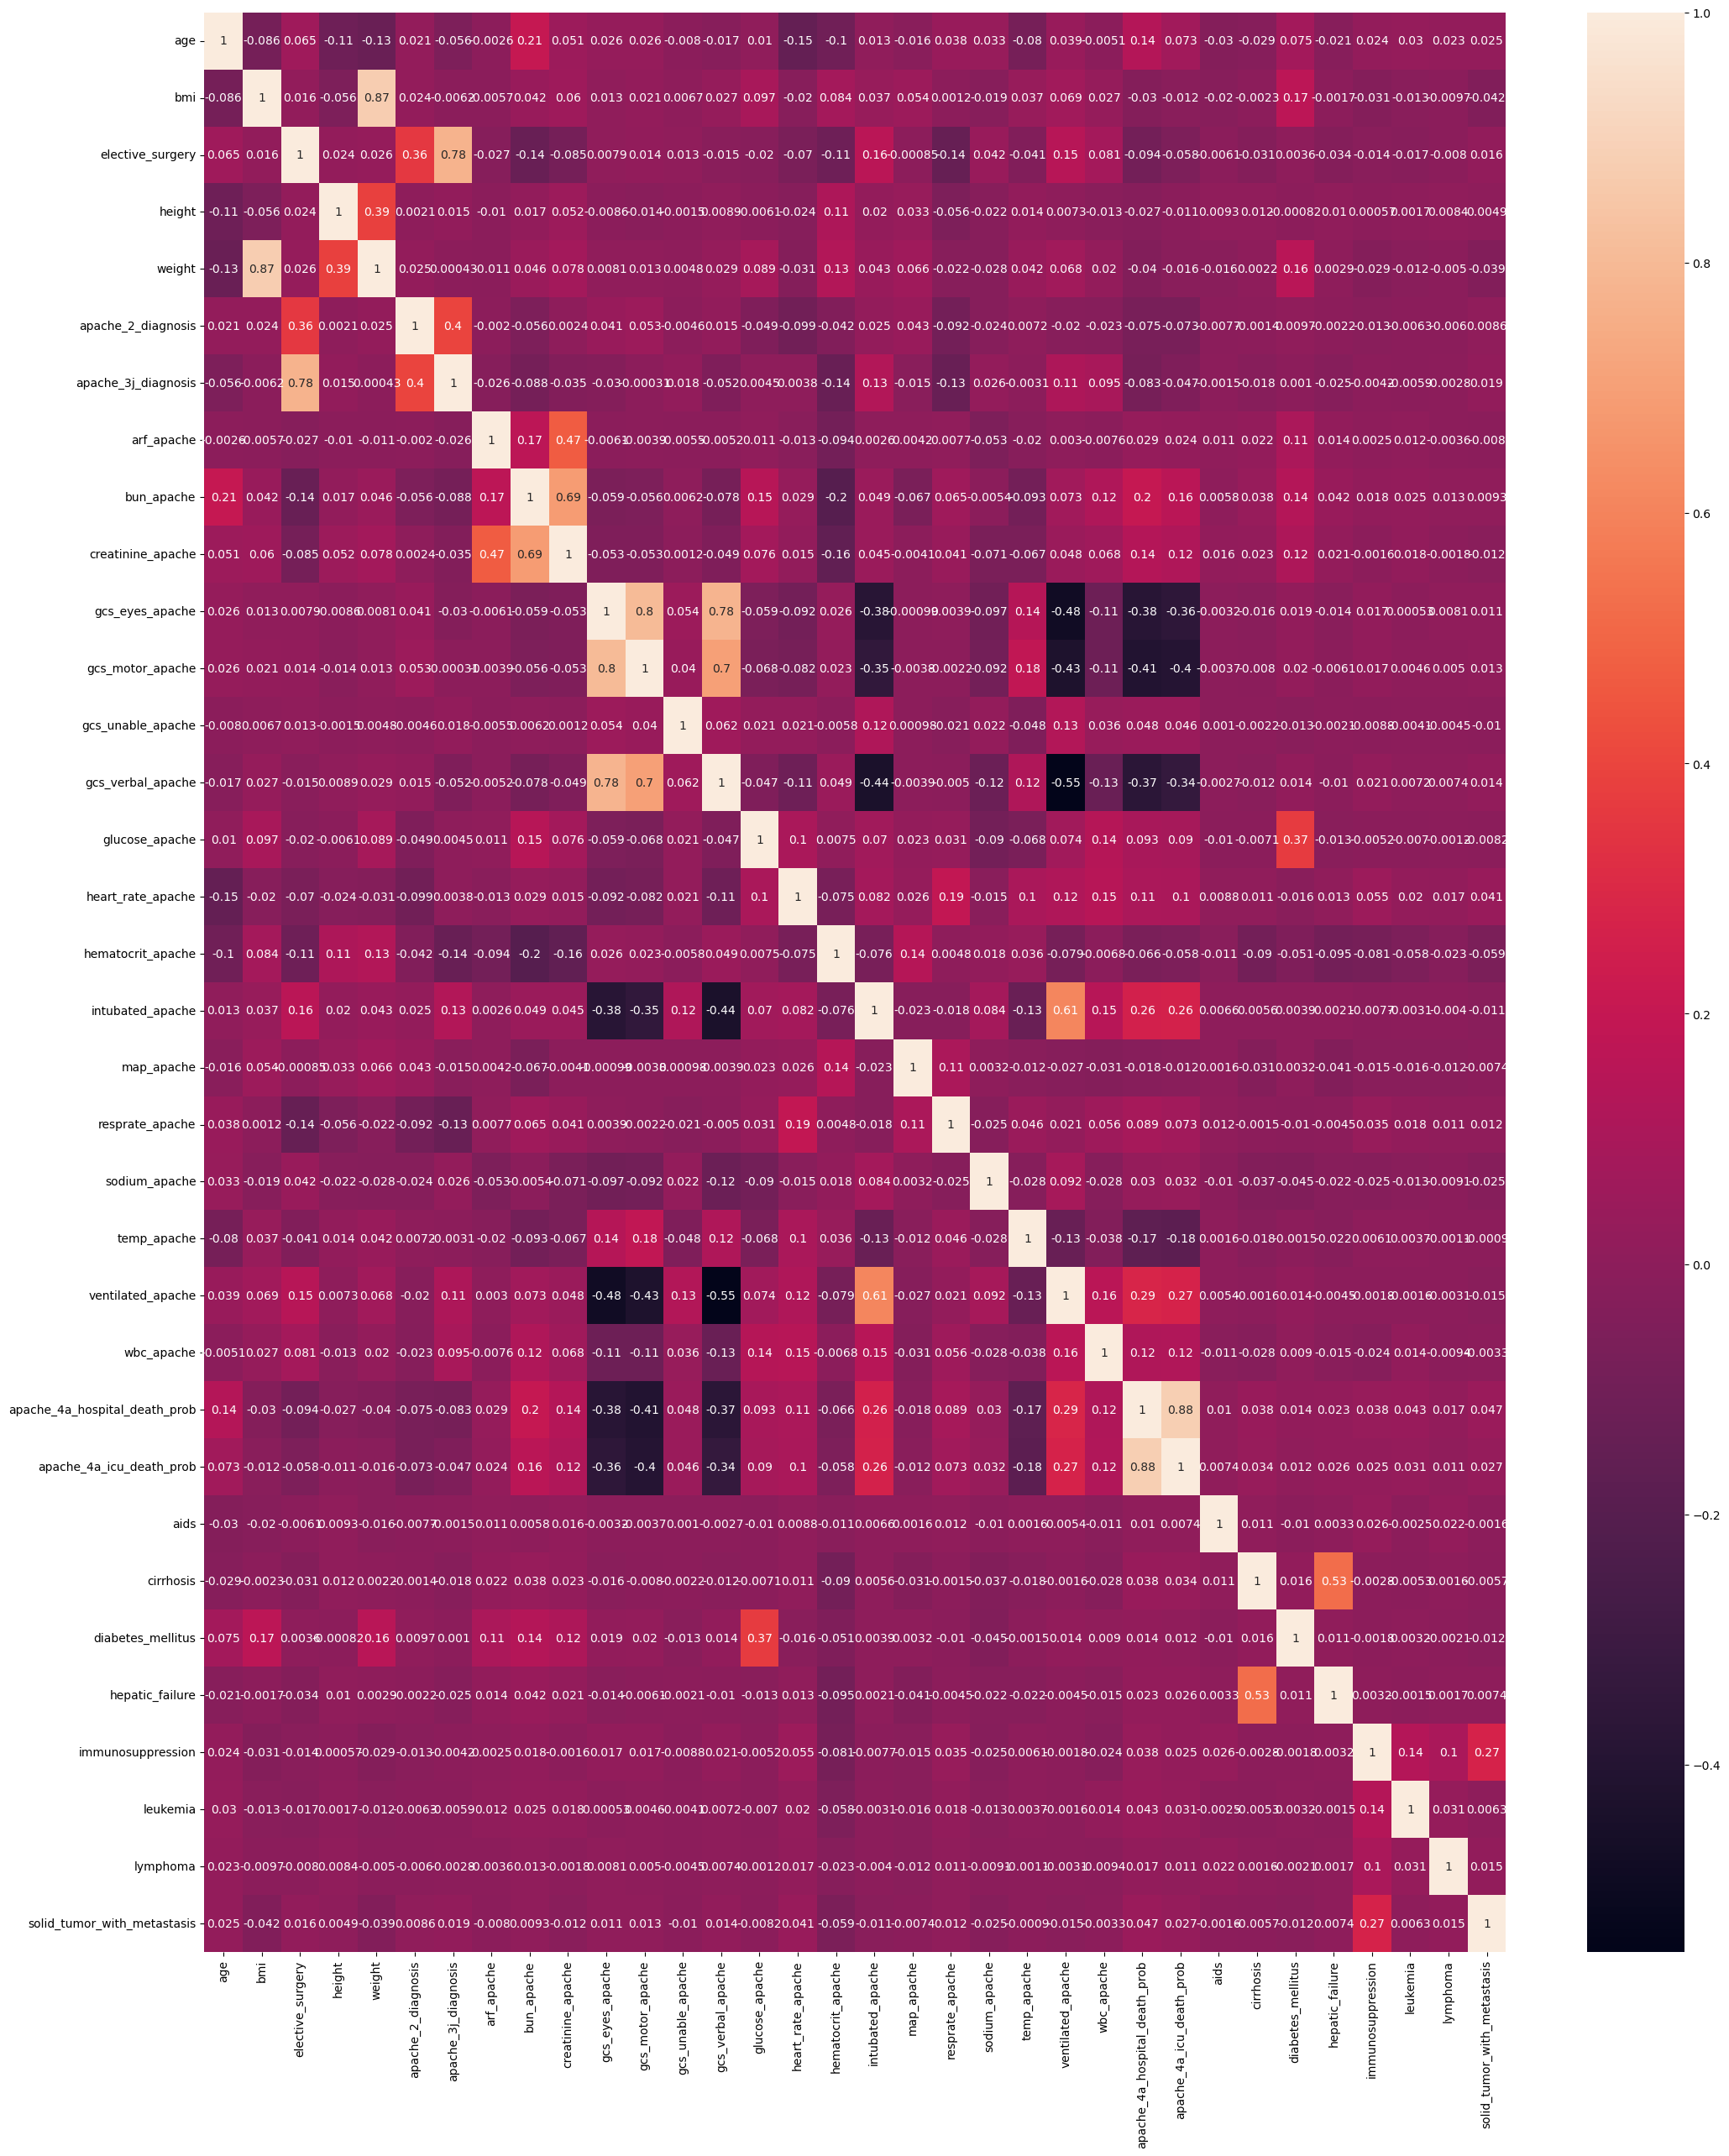

In [146]:
plt.figure(figsize=(25,30))
sns.heatmap(df_numerical.corr(),annot=True)

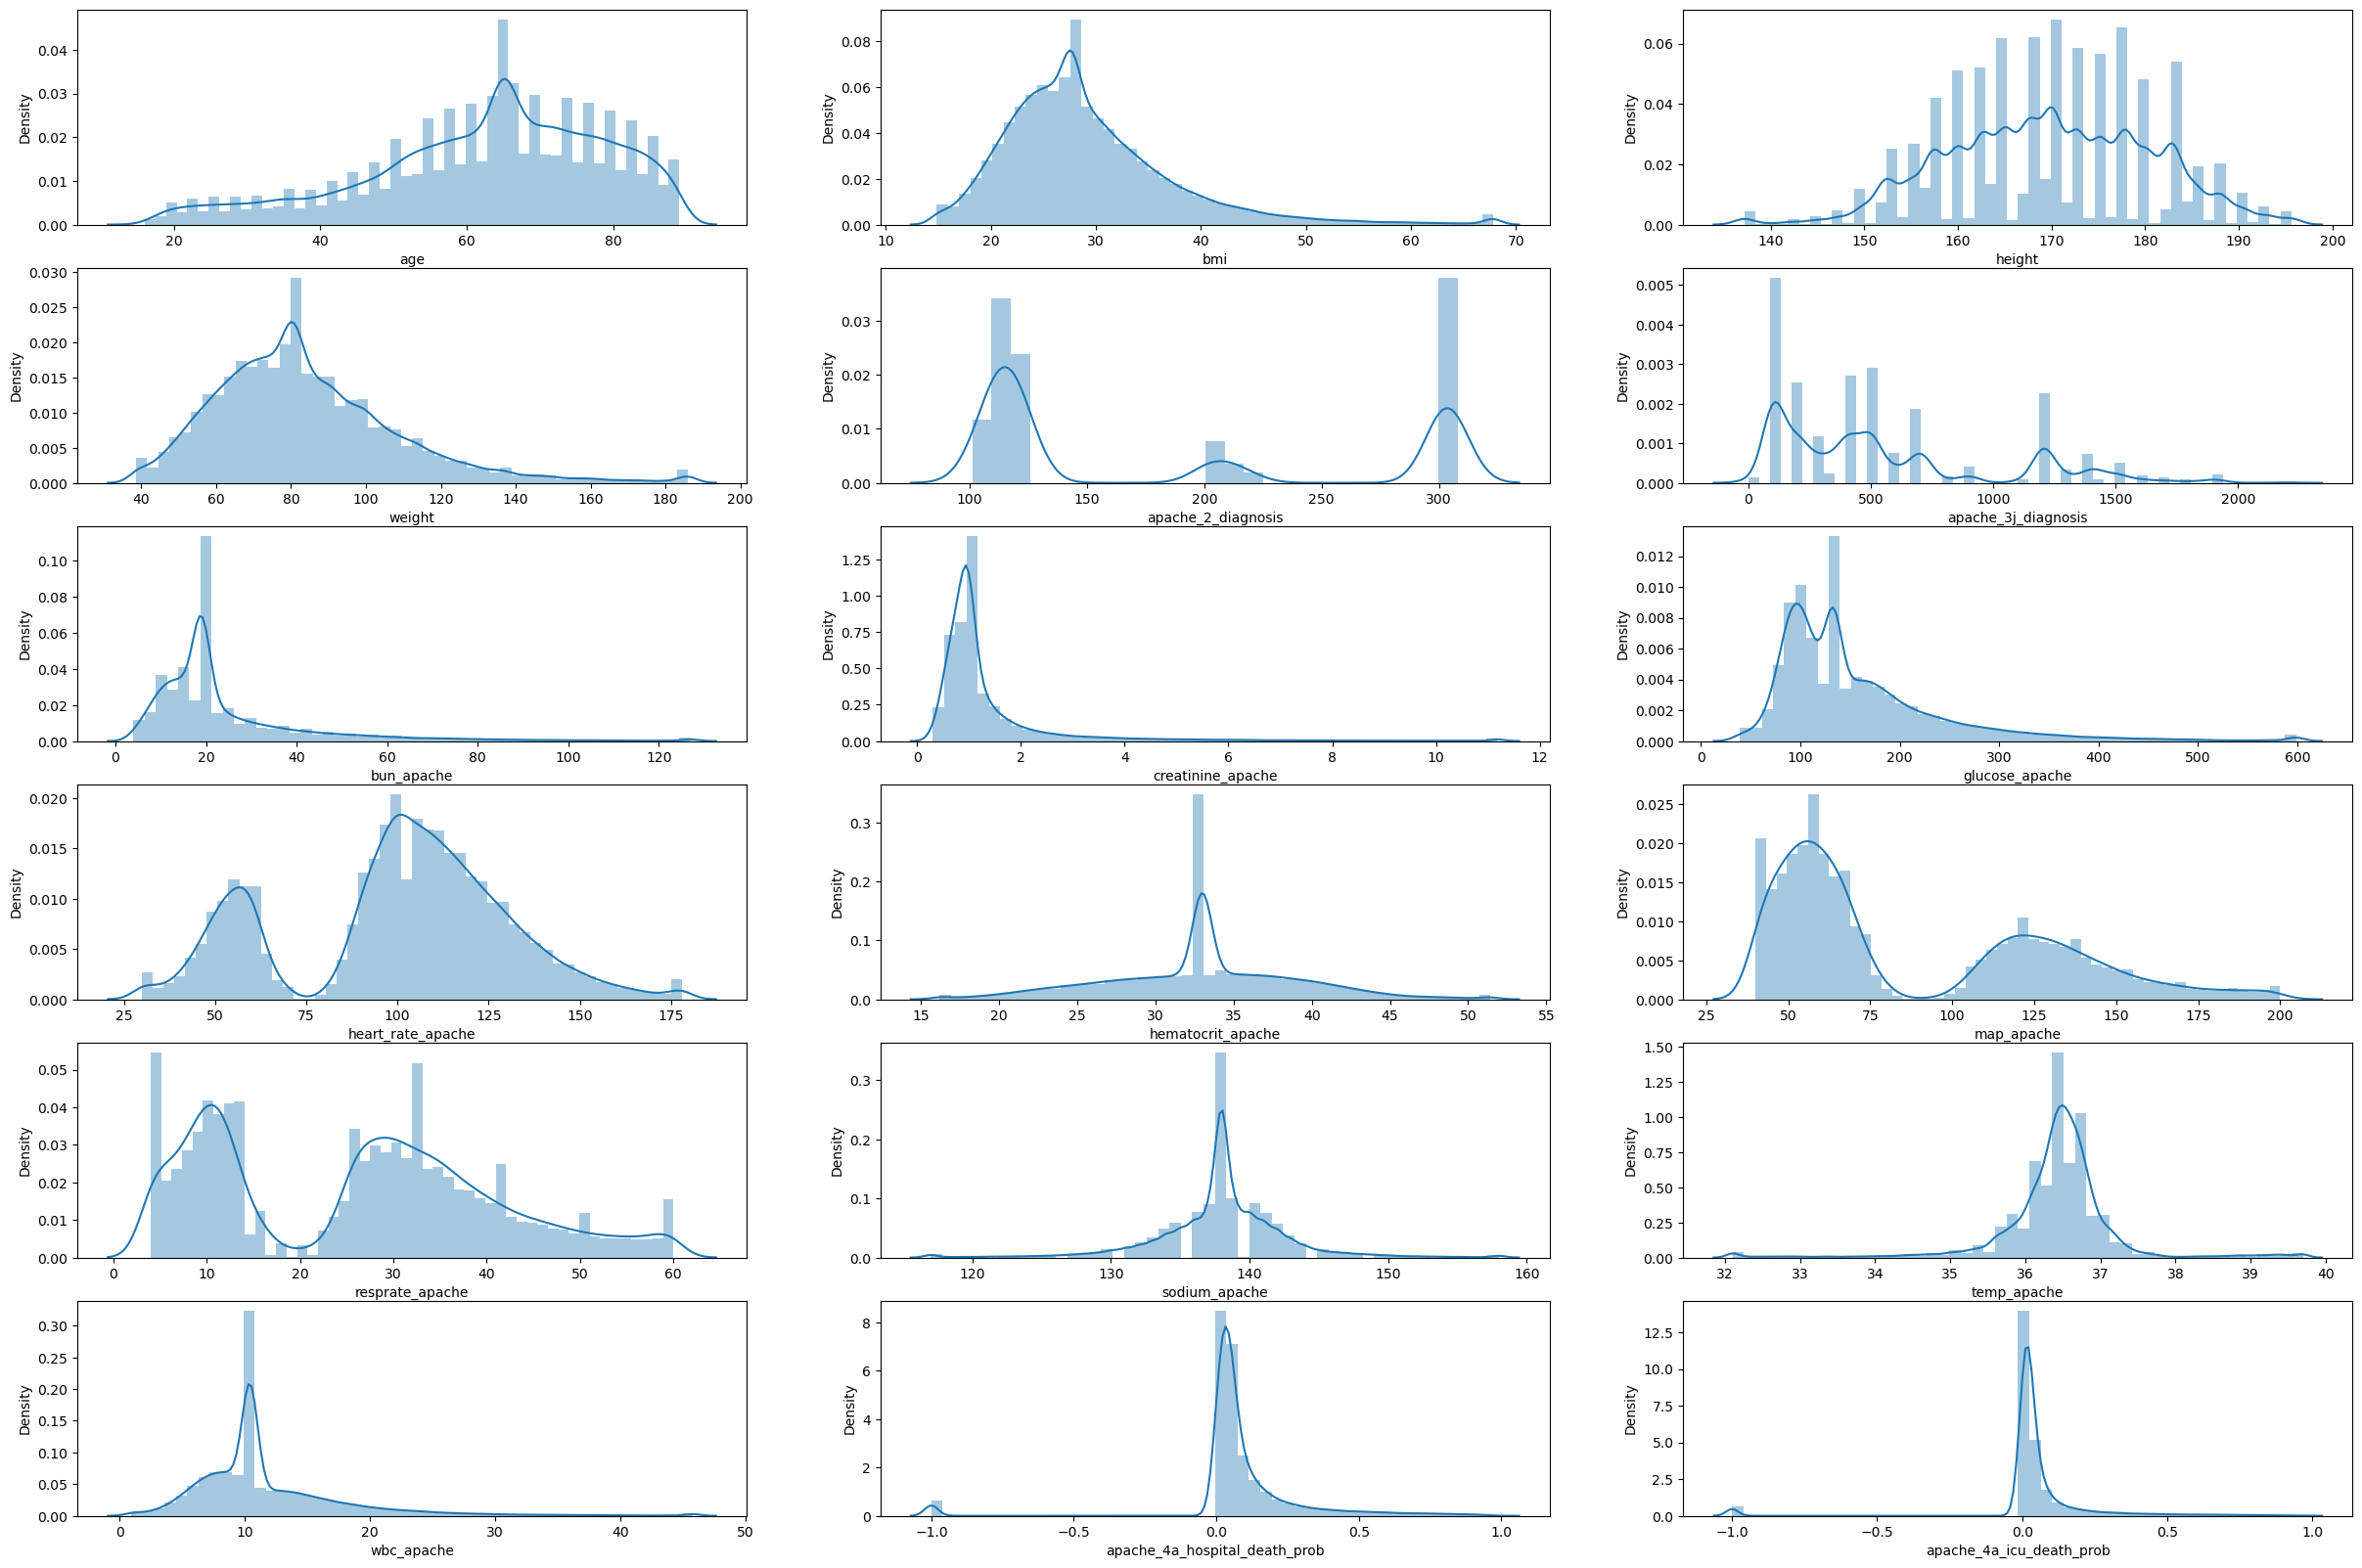

In [147]:
plt.figure(figsize=(30,20))
s=1
for p in patient_continuous:
    plt.subplot(6,3,s)
    sns.distplot(patient_continuous[p])
    s+=1

# Feature Scaling/Transformation:

In [148]:
pt=PowerTransformer()
pwrtransformed_data_num=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)
pwrtransformed_data_num.head()

,age,bmi,elective_surgery,height,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0.262608,-0.828257,-0.474441,0.996207,-0.291082,-0.881672,0.201098,-0.168977,0.766959,1.527208,...,0.011450,-0.023581,-0.029175,-0.125764,1.864283,-0.114264,-0.163259,-0.084027,-0.064161,-0.144586
1,0.924492,-0.039544,-0.474441,-0.904887,-0.476735,-1.049900,-0.719084,-0.168977,-1.376419,-1.431400,...,1.836706,1.324603,-0.029175,-0.125764,1.864283,-0.114264,-0.163259,-0.084027,-0.064161,-0.144586
2,-1.946906,0.550684,-0.474441,0.269207,0.608360,-0.615472,0.598680,-0.168977,-0.026352,-0.066231,...,-0.422030,-0.277090,-0.029175,-0.125764,-0.536399,-0.114264,-0.163259,-0.084027,-0.064161,-0.144586
3,1.239563,-0.845741,2.107744,-0.439605,-0.949178,0.676168,1.307726,-0.168977,-0.026352,-0.066231,...,-0.251831,-0.126137,-0.029175,-0.125764,-0.536399,-0.114264,-0.163259,-0.084027,-0.064161,-0.144586
4,-2.119224,-0.005437,-0.474441,1.750986,0.006275,-0.699475,0.409529,-0.168977,-0.026352,-0.066231,...,-0.208612,-0.176840,-0.029175,-0.125764,-0.536399,-0.114264,-0.163259,-0.084027,-0.064161,-0.144586


In [85]:
# Checking the outliers by its skweness after power transformation:
pwrtransformed_data_num.skew()

age                              -0.165749
bmi                              -0.011893
elective_surgery                  1.633330
height                           -0.012960
weight                           -0.001831
apache_2_diagnosis                0.315277
apache_3j_diagnosis              -0.017871
arf_apache                        5.749089
bun_apache                       -0.018964
creatinine_apache                 0.120755
gcs_eyes_apache                  -1.031383
gcs_motor_apache                 -1.593455
gcs_unable_apache                10.156879
gcs_verbal_apache                -0.923445
glucose_apache                   -0.007185
heart_rate_apache                -0.100324
hematocrit_apache                 0.018993
intubated_apache                  1.959939
map_apache                        0.116517
resprate_apache                  -0.144407
sodium_apache                     0.114798
temp_apache                       0.285228
ventilated_apache                 0.756143
wbc_apache 

## Graphical Representation after Outlier Treatment :

ValueError: num must be 1 <= num <= 30, not 31

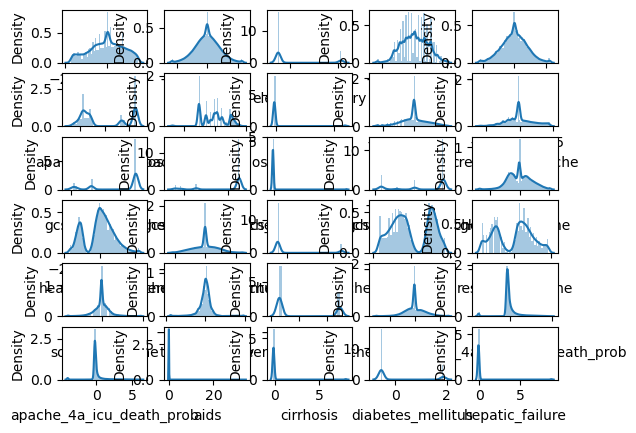

In [151]:
##plt.figure(figsize=(50,20))
s=1
for p in pwrtransformed_data_num:   
    plt.subplot(6,5,s)
    sns.distplot(pwrtransformed_data_num[p])
    s+=1

Hence we have reduced the effect of outltiers and have prepared the final dataset for Predictive modelling.

# Encoding the categorical variables:

In [86]:
df_categorical = patient_records.select_dtypes(object)
df_categorical=df_categorical.drop('hospital_death',axis=1)
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

In [87]:
print(df_categorical)

       ethnicity gender hospital_admit_source           icu_admit_source  \
0      Caucasian      M                 Floor                      Floor   
1      Caucasian      F                 Floor                      Floor   
2      Caucasian      F  Emergency Department       Accident & Emergency   
3      Caucasian      F        Operating Room  Operating Room / Recovery   
4      Caucasian      M                 Floor       Accident & Emergency   
...          ...    ...                   ...                        ...   
91708  Caucasian      M      Acute Care/Floor                      Floor   
91709  Caucasian      F  Emergency Department                      Floor   
91710  Caucasian      M  Emergency Department       Accident & Emergency   
91711  Caucasian      F  Emergency Department       Accident & Emergency   
91712  Caucasian      F                 Floor  Operating Room / Recovery   

      icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         

In [88]:
Encode=pd.get_dummies(patient_records,columns = ['hospital_death'],drop_first=True)  

In [89]:
patient_records['hospital_death']=patient_records['hospital_death'].astype(int)

# Logit Model analysis:

In [90]:
# Dependent variables:
X=pwrtransformed_data_num

# Target variable:
y=patient_records[['hospital_death']].reset_index(drop=True)

In [91]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hospital_death  91713 non-null  int32
dtypes: int32(1)
memory usage: 358.4 KB


#### Concatenating the powertransformed numerical features with One hot encoded categorical featues:

In [92]:
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

# Concatenating the Encoded categorical attributes to the powertransformed numerical attributes:
X=pd.concat([pd.DataFrame(X),Encode],axis=1)

# Feature Engineeering:

#### Removing features involved in multicollinearity uisng Variance Inflation Factor:

In [93]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [94]:
X =df_numerical.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,18.618577
1,bmi,194.776597
2,elective_surgery,3.436806
3,height,911.256401
4,weight,206.706752
5,apache_2_diagnosis,6.920894
6,apache_3j_diagnosis,6.893552
7,arf_apache,1.438743
8,bun_apache,6.419268
9,creatinine_apache,5.303037


In [95]:
for i in range(len(X.columns)):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    multi=vif[vif['VIF Factor']>10]
    if (multi.empty==False):
        df_numerical_sorted=multi.sort_values(by='VIF Factor',ascending=False)
    else:
        print(vif)
        break
    if (df_numerical_sorted.empty==False):
        X=X.drop(df_numerical_sorted['Features'].iloc[0],axis=1)
    else:
        print(vif)

    VIF Factor                       Features
0     3.138249               elective_surgery
1     6.053449             apache_2_diagnosis
2     6.323844            apache_3j_diagnosis
3     1.427661                     arf_apache
4     5.845925                     bun_apache
5     5.161021              creatinine_apache
6     1.051636              gcs_unable_apache
7     7.266050              gcs_verbal_apache
8     5.011426                 glucose_apache
9     1.964717               intubated_apache
10    4.911801                     map_apache
11    3.966887                resprate_apache
12    2.624078              ventilated_apache
13    4.751135                     wbc_apache
14    5.195474  apache_4a_hospital_death_prob
15    4.629955       apache_4a_icu_death_prob
16    1.003017                           aids
17    1.407838                      cirrhosis
18    1.521512              diabetes_mellitus
19    1.403176                hepatic_failure
20    1.062271              immuno

In [96]:
X.head()

,elective_surgery,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,intubated_apache,...,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma
0,0,113.0,502.01,0,31.0,2.51,0,4,168.0,0,...,14.1,0.10,0.05,0,0,1,0,0,0,0
1,0,108.0,203.01,0,9.0,0.56,0,1,145.0,0,...,12.7,0.47,0.29,0,0,1,0,0,0,0
2,0,122.0,703.03,0,19.0,0.98,0,5,133.0,0,...,10.4,0.00,0.00,0,0,0,0,0,0,0
3,1,203.0,1206.03,0,19.0,0.98,0,5,185.0,1,...,8.0,0.04,0.03,0,0,0,0,0,0,0
4,0,119.0,601.01,0,19.0,0.98,0,5,133.0,0,...,10.4,0.05,0.02,0,0,0,0,0,0,0


In [97]:
# Checking the shape of the dependent dataset
X.shape

(91713, 23)

#### Splitting the data into training and testing set in the ratio (80:20):

In [98]:
rc=10
X=sm.add_constant(X)   # Initialising the random state at 10.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rc)

## Logit model summary for full model:

In [99]:
# using statsmodels:
X_train_const=sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train_const).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.230420
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         hospital_death   No. Observations:                73370
Model:                          Logit   Df Residuals:                    73346
Method:                           MLE   Df Model:                           23
Date:                Sat, 03 Sep 2022   Pseudo R-squ.:                  0.2191
Time:                        12:43:18   Log-Likelihood:                -16906.
converged:                       True   LL-Null:                       -21648.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.3207      0.085    -39.237      0.000      -3.487      -3.155
elective_surgery                 -0.6546      0.074     -8.874      0.000      -0.799      -0.510
apache_2_diagnosis               -0.0009      0.000     -4.626      0.000      -0.001      -0.001
apache_3j_diagnosis              -0.0002   5.48e-05     -3.393      0.001      -0.000   -7.86e-05
arf_apache                        0.2946      0.089      3.320      0.001       0.121       0.469
bun_apache                        0.0128      0.001     14.224      0.000       0.011       0.015
creatinine_apache                -0.0262      0.014     -1.864      0.062      -0.054       0.001
gcs_unable_apache                 0.7095      0.106      6.662      0.000       0.501       0.918
gcs_verbal_apache                -0.0949      0.011     -8.431      0.000      -0.117      -0.073
glucose_apache                    0.0005      0.000      2.783      0.005       0.000       0.001
intubated_apache                 -0.0930      0.040     -2.304      0.021      -0.172      -0.014
map_apache                       -0.0032      0.000     -9.309      0.000      -0.004      -0.003
resprate_apache                   0.0130      0.001     13.271      0.000       0.011       0.015
ventilated_apache                 0.8878      0.039     22.622      0.000       0.811       0.965
wbc_apache                        0.0190      0.002      9.539      0.000       0.015       0.023
apache_4a_hospital_death_prob     3.2889      0.158     20.838      0.000       2.980       3.598
apache_4a_icu_death_prob         -0.3632      0.162     -2.243      0.025      -0.681      -0.046
aids                             -0.6583      0.486     -1.356      0.175      -1.610       0.293
cirrhosis                         0.3796      0.113      3.362      0.001       0.158       0.601
diabetes_mellitus                -0.2853      0.039     -7.363      0.000      -0.361      -0.209
hepatic_failure                   0.4491      0.122      3.691      0.000       0.211       0.688
immunosuppression                 0.5298      0.076      6.976      0.000       0.381       0.679
leukemia                          0.3043      0.137      2.213      0.027       0.035       0.574
lymphoma                          0.4231      0.179      2.363      0.018       0.072       0.774
=================================================================================================
"""

# Statistical Analysis of the features:

#### Significant features affecting the model:

In [100]:
# If the p value for Wald test statistic is less than 0.05, we are considering the feature to be significant.
significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_features=pd.DataFrame(data=significant,columns=['p-value'])
significant_features.drop('const',axis=0)

,p-value
elective_surgery,7.025714e-19
apache_2_diagnosis,3.732221e-06
apache_3j_diagnosis,6.916060e-04
arf_apache,9.015745e-04
bun_apache,6.503052e-46
gcs_unable_apache,2.695918e-11
gcs_verbal_apache,3.418772e-17
glucose_apache,5.385770e-03
intubated_apache,2.123190e-02
map_apache,1.288916e-20


Above the following dependent variables contribute significantly to the overall model performance:




#### Log odds value for each feature:

In [101]:
log_odds=round(logit_model.params,2)
log_odds_data=pd.DataFrame(log_odds,columns=['Log odds'])
log_odds_data.drop('const',axis=0)

,Log odds
elective_surgery,-0.65
apache_2_diagnosis,-0.00
apache_3j_diagnosis,-0.00
arf_apache,0.29
bun_apache,0.01
creatinine_apache,-0.03
gcs_unable_apache,0.71
gcs_verbal_apache,-0.09
glucose_apache,0.00
intubated_apache,-0.09


#### Odds Value for each feature:
    

In [102]:
odds=round(np.exp(logit_model.params),2)
odds_data=pd.DataFrame(odds,columns=['Odds value'])
odds_data.sort_values(by='Odds value',ascending=False).drop('const',axis=0)

,Odds value
apache_4a_hospital_death_prob,26.81
ventilated_apache,2.43
gcs_unable_apache,2.03
immunosuppression,1.70
hepatic_failure,1.57
lymphoma,1.53
cirrhosis,1.46
leukemia,1.36
arf_apache,1.34
wbc_apache,1.02


#### Higher the odds value, greater is the relation of the feature with the target variable.

#### Model Evaluation : McFadden's R^2 value(Pseudo R^2)


In [103]:
accuracy=logit_model.prsquared
print('Logit model accuracy : ',accuracy)

Logit model accuracy :  0.21906013888443798


# Model Performance:

## Accuracy using Confusion Matrix:

#### Considering the probability threshold to be 0.5:

In [104]:
# Initializing the probability threshold:
th=0.5
ypred_prob=logit_model.predict(X_test)
ypred=[0 if p<th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat=confusion_matrix(y_test,ypred)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix for Logit Model : ')
print('---------------------------------','\n')
print(confusion_mat)

Confusion Matrix for Logit Model : 
--------------------------------- 

[[16613   183]
 [ 1249   298]]


#### Graphical Representation of Confusion Matrix:

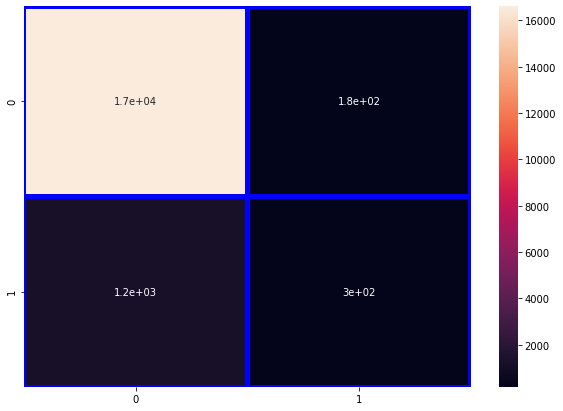

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Calculating optimal value threshold for full model using the Youden's index:

In [106]:
# Computing the True Positive rate(TPR),False Positive rate(FPR) and probability threshold:
fpr, tpr, th= roc_curve(y_test, ypred_prob)

# Creating a Dataframe of the data:
youden= pd.DataFrame({'TPR': tpr,
                       'FPR': fpr,
                        'thres':th})

# Calculating the Younden's index:
youden['YI']= youden.TPR-youden.FPR
youden= youden.sort_values(by='YI',ascending=False).reset_index(drop=True)
print(youden.head(5))
print('-----------------------------------------','\n')
# or
print('Optimal threshold for probability: ',round(youden['YI'].max(),2))

        TPR       FPR     thres        YI
0  0.710407  0.201834  0.088632  0.508573
1  0.698772  0.190641  0.093154  0.508131
2  0.709761  0.201715  0.088659  0.508046
3  0.709114  0.201179  0.088807  0.507936
4  0.709761  0.201834  0.088635  0.507927
----------------------------------------- 

Optimal threshold for probability:  0.51


#### Considering the Optimal probability threshold:

In [107]:
# Initialising the optimal probability threshold:
opt_th=0.51
ypred_prob=logit_model.predict(X_test)
ypred_optimal=[0 if p<opt_th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat_optimal=confusion_matrix(y_test,ypred_optimal)
tn = confusion_mat_optimal[0,0]
tp = confusion_mat_optimal[1,1]
fp = confusion_mat_optimal[0,1]
fn = confusion_mat_optimal[1,0]
print('Confusion Matrix from Logit Model : ')
print('------------------------------------','\n')
print(confusion_mat_optimal)

Confusion Matrix from Logit Model : 
------------------------------------ 

[[16626   170]
 [ 1261   286]]


#### Graphical Representation of Confusion Matrix:

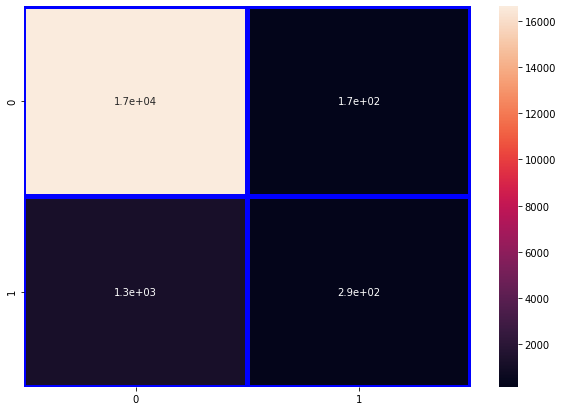

In [108]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat_optimal,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Logit model accuracy from confusion matrix :

In [109]:
# For probability threshold as 0.5:
logit_model_accuracy_test=accuracy_score(y_test,ypred)
print('Logit model accuracy for test data using confusion matrix : ',logit_model_accuracy_test)

Logit model accuracy for test data using confusion matrix :  0.9219320721801232


In [110]:
# For optimal probability threshold as 0.51:
logit_model_optimal_accuracy=accuracy_score(y_test,ypred_optimal)
print('Logit model accuracy using confusion matrix : ',logit_model_optimal_accuracy)

Logit model accuracy using confusion matrix :  0.9219865888894946


In [111]:
# Hence we will be considering 0.51 as the threshold as it gives a slightly better overall accuracy.

#### Logit model classification report:

In [112]:
# Computing the classification report:

logit_classification=classification_report(y_test,ypred)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logit_classification)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16796
           1       0.62      0.19      0.29      1547

    accuracy                           0.92     18343
   macro avg       0.77      0.59      0.63     18343
weighted avg       0.90      0.92      0.90     18343



# 1. Logistic Regression Model using Scikit-learn:

In [113]:
# Logistic Regression Model using sklearn:
log_reg=LogisticRegression()
log_model=log_reg.fit(X_train,y_train)
ypred_lr_test=log_model.predict(X_test)
ypred_lr_train=log_model.predict(X_train)
ypred_lr_probability=log_model.predict_proba(X_test)[:,1]

## 1.a) Model Performance Evaluation:

#### 1.a).1.  Confusion Matrix for Logistic Regression Model:

In [114]:
# Computing the Confusion matrix: 

confusion_mat=confusion_matrix(y_test,ypred_lr_test)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix form Logistic Regression Model : ')
print('------------------------------------------------','\n')
print(confusion_mat)

Confusion Matrix form Logistic Regression Model : 
------------------------------------------------ 

[[16548   248]
 [ 1226   321]]


#### 1.a).2.  Graphical Representation of Confusion Matrix:

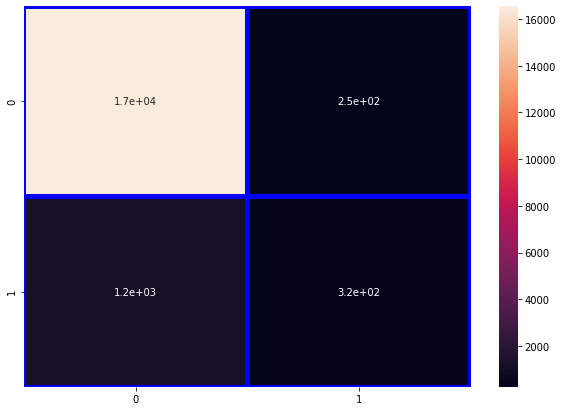

In [115]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Sensitivity and Specificity:

In [116]:
Sensitivity_Logistic=(tp/(tp+fn))
print('Sensitivity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Logistic)
print('\n')
Specificity_Logistic=(tn/(tn+fp))
print('Specificity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Specificity_Logistic)

Sensitivity of the Logistic Regression Model: 
--------------------------------------------- 

0.20749838396897222


Specificity of the Logistic Regression Model: 
--------------------------------------------- 

0.9852345796618243


#### 1.a).3.  Accuracy Analysis:

In [117]:
print('The Accuracy score of the test data for Logistic Regression model : ')
print(accuracy_score(y_test,ypred_lr_test),'\n')
print('The Accuracy score of the train data for Logistic Regression model : ')
print(accuracy_score(y_train,ypred_lr_train))

The Accuracy score of the test data for Logistic Regression model : 
0.9196423703865235 

The Accuracy score of the train data for Logistic Regression model : 
0.9166553087092817


#### 1.a).4. Logistic Regression model classification report:

In [118]:
# Computing the classification report:

logistic_report=classification_report(y_test,ypred_lr_test)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logistic_report)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16796
           1       0.56      0.21      0.30      1547

    accuracy                           0.92     18343
   macro avg       0.75      0.60      0.63     18343
weighted avg       0.90      0.92      0.90     18343



#### 1.a).5. ROC Curve for Logistic Regression Model:

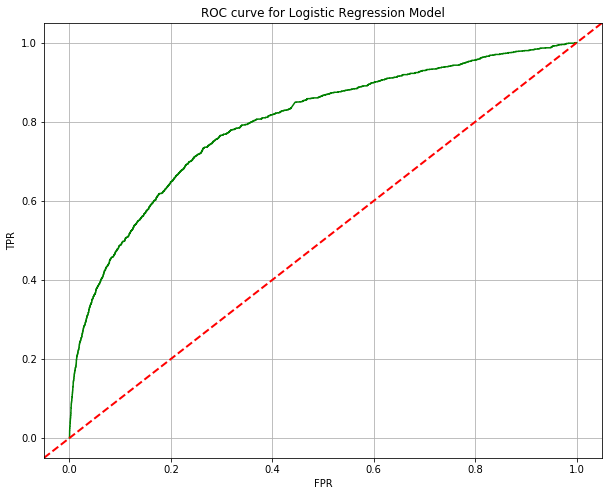

In [119]:
fpr,tpr,th=roc_curve(y_test,ypred_lr_probability)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='green')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve for Logistic Regression Model')
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 1.a).6. ROC AUC Score:

In [120]:
print('The ROC AUC score of the Logistic Regression model: ')
print('--------------------------------------------------- ','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_lr_probability))

The ROC AUC score of the Logistic Regression model: 
---------------------------------------------------  

ROC AUC :  0.7955783674599779


#### 1.a).7. Cross Entropy:

In [121]:
cross_entropy=log_loss(y_test,ypred_lr_test)
print('The Cross Entropy score of the Logistic Regression model ')
print('--------------------------------------------------- ','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of the Logistic Regression model 
---------------------------------------------------  

Cross Entropy :  2.775465011517257


#### 1.a).8. Bias Error and Variance Error:

In [122]:
k=KFold(n_splits=10,shuffle=True, random_state=10)
scores=cross_val_score(estimator=log_model,X=X_train,y=y_train,cv=k,scoring='accuracy')
print("Mean Score : ",np.mean(scores))
print("Bias error : ",(1-np.mean(scores))*100)
print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')

Mean Score :  0.9162191631457001
Bias error :  8.378083685429994
Variance error :  0.4205450878290498 



## 1.b) Inferences for Logistic Regression Model:

* Cross Entropy for the Logistic Regression Model is 2.77


* ROC AUC Score for the Logistic Regression Model is 79.55


* The Model Accuracy for the Logistic Regression Model is coming out to be around 92%.


* f1 weighted avg for the Logistic Regression Model is around 90%.


* Specificity : 98%


* Sensitivity : 20.74%


# 2. K-Nearest Neighbors Classification Model using Scikit-learn:

In [124]:
# Classification Model using sklearn:
knn_algorithm=KNeighborsClassifier()
knn_model=knn_algorithm.fit(X_train,y_train)
ypred_knn_test=knn_model.predict(X_test)
ypred_knn_train=knn_model.predict(X_train)
ypred_probability_knn=knn_model.predict_proba(X_test)[:,1]

## 2.a) Model Performance Evaluation:

#### 2.a).1. Confusion Matrix for K-Nearest Neighbors Model:

In [125]:
# Computing the Confusion matrix:

knn_confusion_mat=confusion_matrix(y_test,ypred_knn_test)
tn = knn_confusion_mat[0,0]
tp = knn_confusion_mat[1,1]
fp = knn_confusion_mat[0,1]
fn = knn_confusion_mat[1,0]
print('Confusion Matrix for K-Nearest Neighbors Model : ')
print('------------------------------------------------','\n')
print(knn_confusion_mat)

Confusion Matrix for K-Nearest Neighbors Model : 
------------------------------------------------ 

[[16534   262]
 [ 1387   160]]


#### 2.a).2.  Graphical Representation of Confusion Matrix:

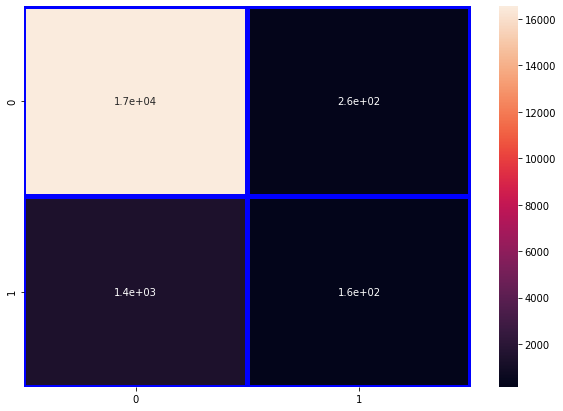

In [126]:
plt.figure(figsize=(10,7))
sns.heatmap(knn_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Sensitivity and Specificity:

In [127]:
Sensitivity_KNN=(tp/(tp+fn))
print('Sensitivity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_KNN)
print('\n')
Specificity_KNN=(tn/(tn+fp))
print('Specificity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Specificity_KNN)

Sensitivity of the KNN Model: 
--------------------------------------------- 

0.10342598577892695


Specificity of the KNN Model: 
--------------------------------------------- 

0.9844010478685401


#### 2.a).3. Accuracy Analysis:

In [128]:
print('The Accuracy score of the test data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_test,ypred_knn_test),'\n')
print('The Accuracy score of the train data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_train,ypred_knn_train))

The Accuracy score of the test data for K-Nearest Neighbors Model : 
0.9101019462465245 

The Accuracy score of the train data for K-Nearest Neighbors Model : 
0.9236472672754532


#### 2.a).4. K-Nearest Neighbors Model classification report:

In [129]:
# Computing the classification report:

knn_report=classification_report(y_test,ypred_knn_test)
print('K-Nearest Neighbors Model classification report: ')
print('------------------------------------------------','\n')
print(knn_report)

K-Nearest Neighbors Model classification report: 
------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     16796
           1       0.38      0.10      0.16      1547

    accuracy                           0.91     18343
   macro avg       0.65      0.54      0.56     18343
weighted avg       0.88      0.91      0.89     18343



#### 2.a).5. ROC Curve for K-Nearest Neighbors Model:

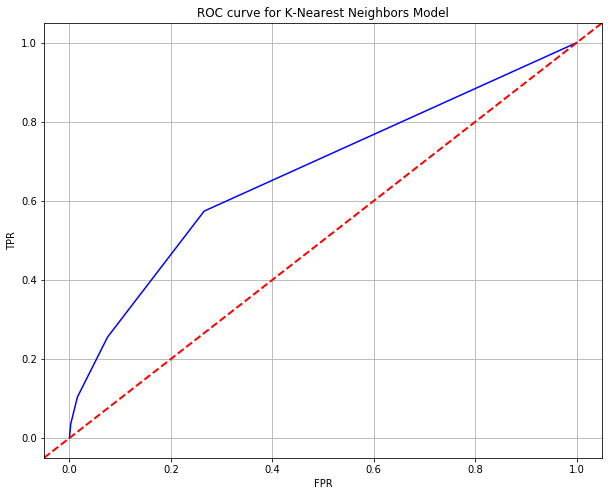

In [130]:
fpr,tpr,th=roc_curve(y_test,ypred_probability_knn)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='blue')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve for K-Nearest Neighbors Model')
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 2.a).6. ROC AUC Score:

In [131]:
print('The ROC AUC score of the K-Nearest Neighbors Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_probability_knn))

The ROC AUC score of the K-Nearest Neighbors Model 
-------------------------------------------------- 

ROC AUC :  0.6685902721320818


#### 2.a).7. Cross Entropy:

In [132]:
cross_entropy=log_loss(y_test,ypred_knn_test)
print('The Cross Entropy score of K-Nearest Neighbors Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of K-Nearest Neighbors Model 
---------------------------------------------------- 

Cross Entropy :  3.104980197881177


#### 2.a).8. Bias Error and Variance Error:

In [133]:
k=KFold(n_splits=10,shuffle=True, random_state=10)
scores=cross_val_score(estimator=knn_model,X=X_train,y=y_train,cv=k,scoring='accuracy')
print("Mean Score : ",np.mean(scores))
print("Bias error : ",(1-np.mean(scores))*100)
print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')

Mean Score :  0.9087774294670847
Bias error :  9.122257053291527
Variance error :  0.3138816750053837 



## 2.b) Inferences for K-Nearest Neighbors Classification Model:

* Cross Entropy for K-Nearest Neighbors Model is 3.10


* ROC AUC Score for the K-Nearest Neighbors Model is 66.84 


* The Model Accuracy for the K-Nearest Neighbors Model is coming out to be around 91%.


* f1 weighted avg for the K-Nearest Neighbors Model is around 89%.


* Specificity : 98.44%


* Sensitivity : 10%

## 3. Decision Tree Classification Model using Scikit-learn:

In [134]:
# Classification Model using sklearn:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test_dt=dt.predict(X_test)
y_pred_train_dt=dt.predict(X_train)
y_test_prob_dt=dt.predict_proba(X_test)[:,1]

## 3.a) Model Performance Evaluation:

#### 3.a).1. Confusion Matrix for Decision Tree classification

In [135]:
# Computing the Confusion matrix:

dt_confusion_mat=confusion_matrix(y_test,y_pred_test_dt)
tn = dt_confusion_mat[0,0]
tp = dt_confusion_mat[1,1]
fp = dt_confusion_mat[0,1]
fn = dt_confusion_mat[1,0]
print('Confusion Matrix for Decision Tree Model : ')
print('------------------------------------------------','\n')
print(dt_confusion_mat)

Confusion Matrix for Decision Tree Model : 
------------------------------------------------ 

[[15586  1210]
 [ 1022   525]]


#### 3.a).2. Graphical Representation of Confusion Matrix:

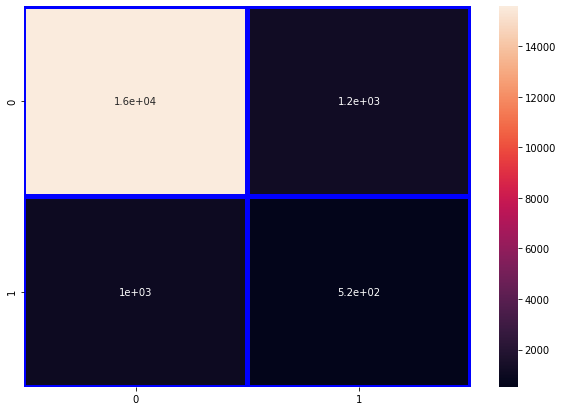

In [136]:
plt.figure(figsize=(10,7))
sns.heatmap(dt_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Sensitivity and Specificity:

In [137]:
Sensitivity_Decision_tree=(tp/(tp+fn))
print('Sensitivity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Decision_tree)
print('\n')
Specificity_Decision_tree=(tn/(tn+fp))
print('Specificity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Specificity_Decision_tree)

Sensitivity of the Decision Tree Model: 
--------------------------------------------- 

0.3393665158371041


Specificity of the Decision Tree Model: 
--------------------------------------------- 

0.9279590378661586


#### 3.a).3.  Accuracy Analysis:

In [138]:
print('The Accuracy score of test data for the Decision Tree Model: ')
print(accuracy_score(y_test,y_pred_test_dt),'\n')
print('The Accuracy score of the train data for the Decision Tree Model: ')
print(accuracy_score(y_train,y_pred_train_dt))

The Accuracy score of test data for the Decision Tree Model: 
0.8783187046829853 

The Accuracy score of the train data for the Decision Tree Model: 
0.9990731906773885


#### 3.a).4.  Decision Tree Model classification report:

In [139]:
# Computing the classification report:

dt_report=classification_report(y_test,y_pred_test_dt)
print('Decision Tree Model classification report: ')
print('-----------------------------------------','\n')
print(dt_report)

Decision Tree Model classification report: 
----------------------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     16796
           1       0.30      0.34      0.32      1547

    accuracy                           0.88     18343
   macro avg       0.62      0.63      0.63     18343
weighted avg       0.88      0.88      0.88     18343



#### 3.a).5. ROC Curve for Decision Tree Model:

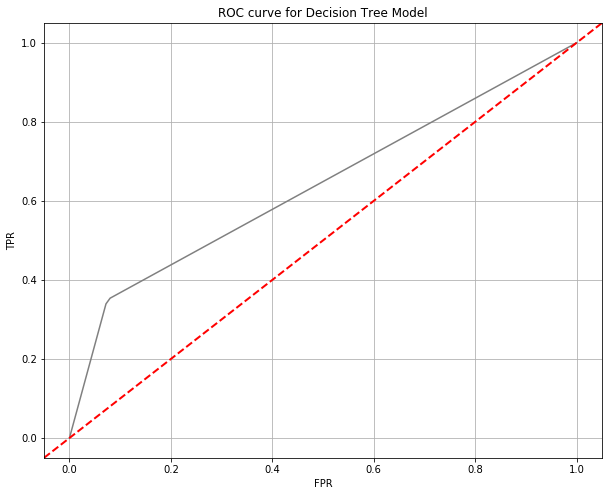

In [140]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_dt)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='grey')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve for Decision Tree Model')
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 3.a).6. ROC AUC Score:

In [141]:
print('The ROC AUC score of the Decision Tree Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_dt))

The ROC AUC score of the Decision Tree Model 
-------------------------------------------------- 

ROC AUC :  0.6376445672338953


#### 3.a).7. Cross Entropy:

In [142]:
cross_entropy=log_loss(y_test,y_pred_test_dt)
print('The Cross Entropy score of Decision Tree Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of Decision Tree Model 
---------------------------------------------------- 

Cross Entropy :  4.202775796016529


#### 3.a).8. Bias Error and Variance Error:

In [143]:
k=KFold(n_splits=10,shuffle=True, random_state=10)
scores=cross_val_score(estimator=dt,X=X_train,y=y_train,cv=k,scoring='accuracy')
print("Mean Score : ",np.mean(scores))
print("Bias error : ",(1-np.mean(scores))*100)
print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')

Mean Score :  0.8759438462586889
Bias error :  12.405615374131107
Variance error :  0.36727822412101907 



#### 3.a).9. Decision Tree Plot:

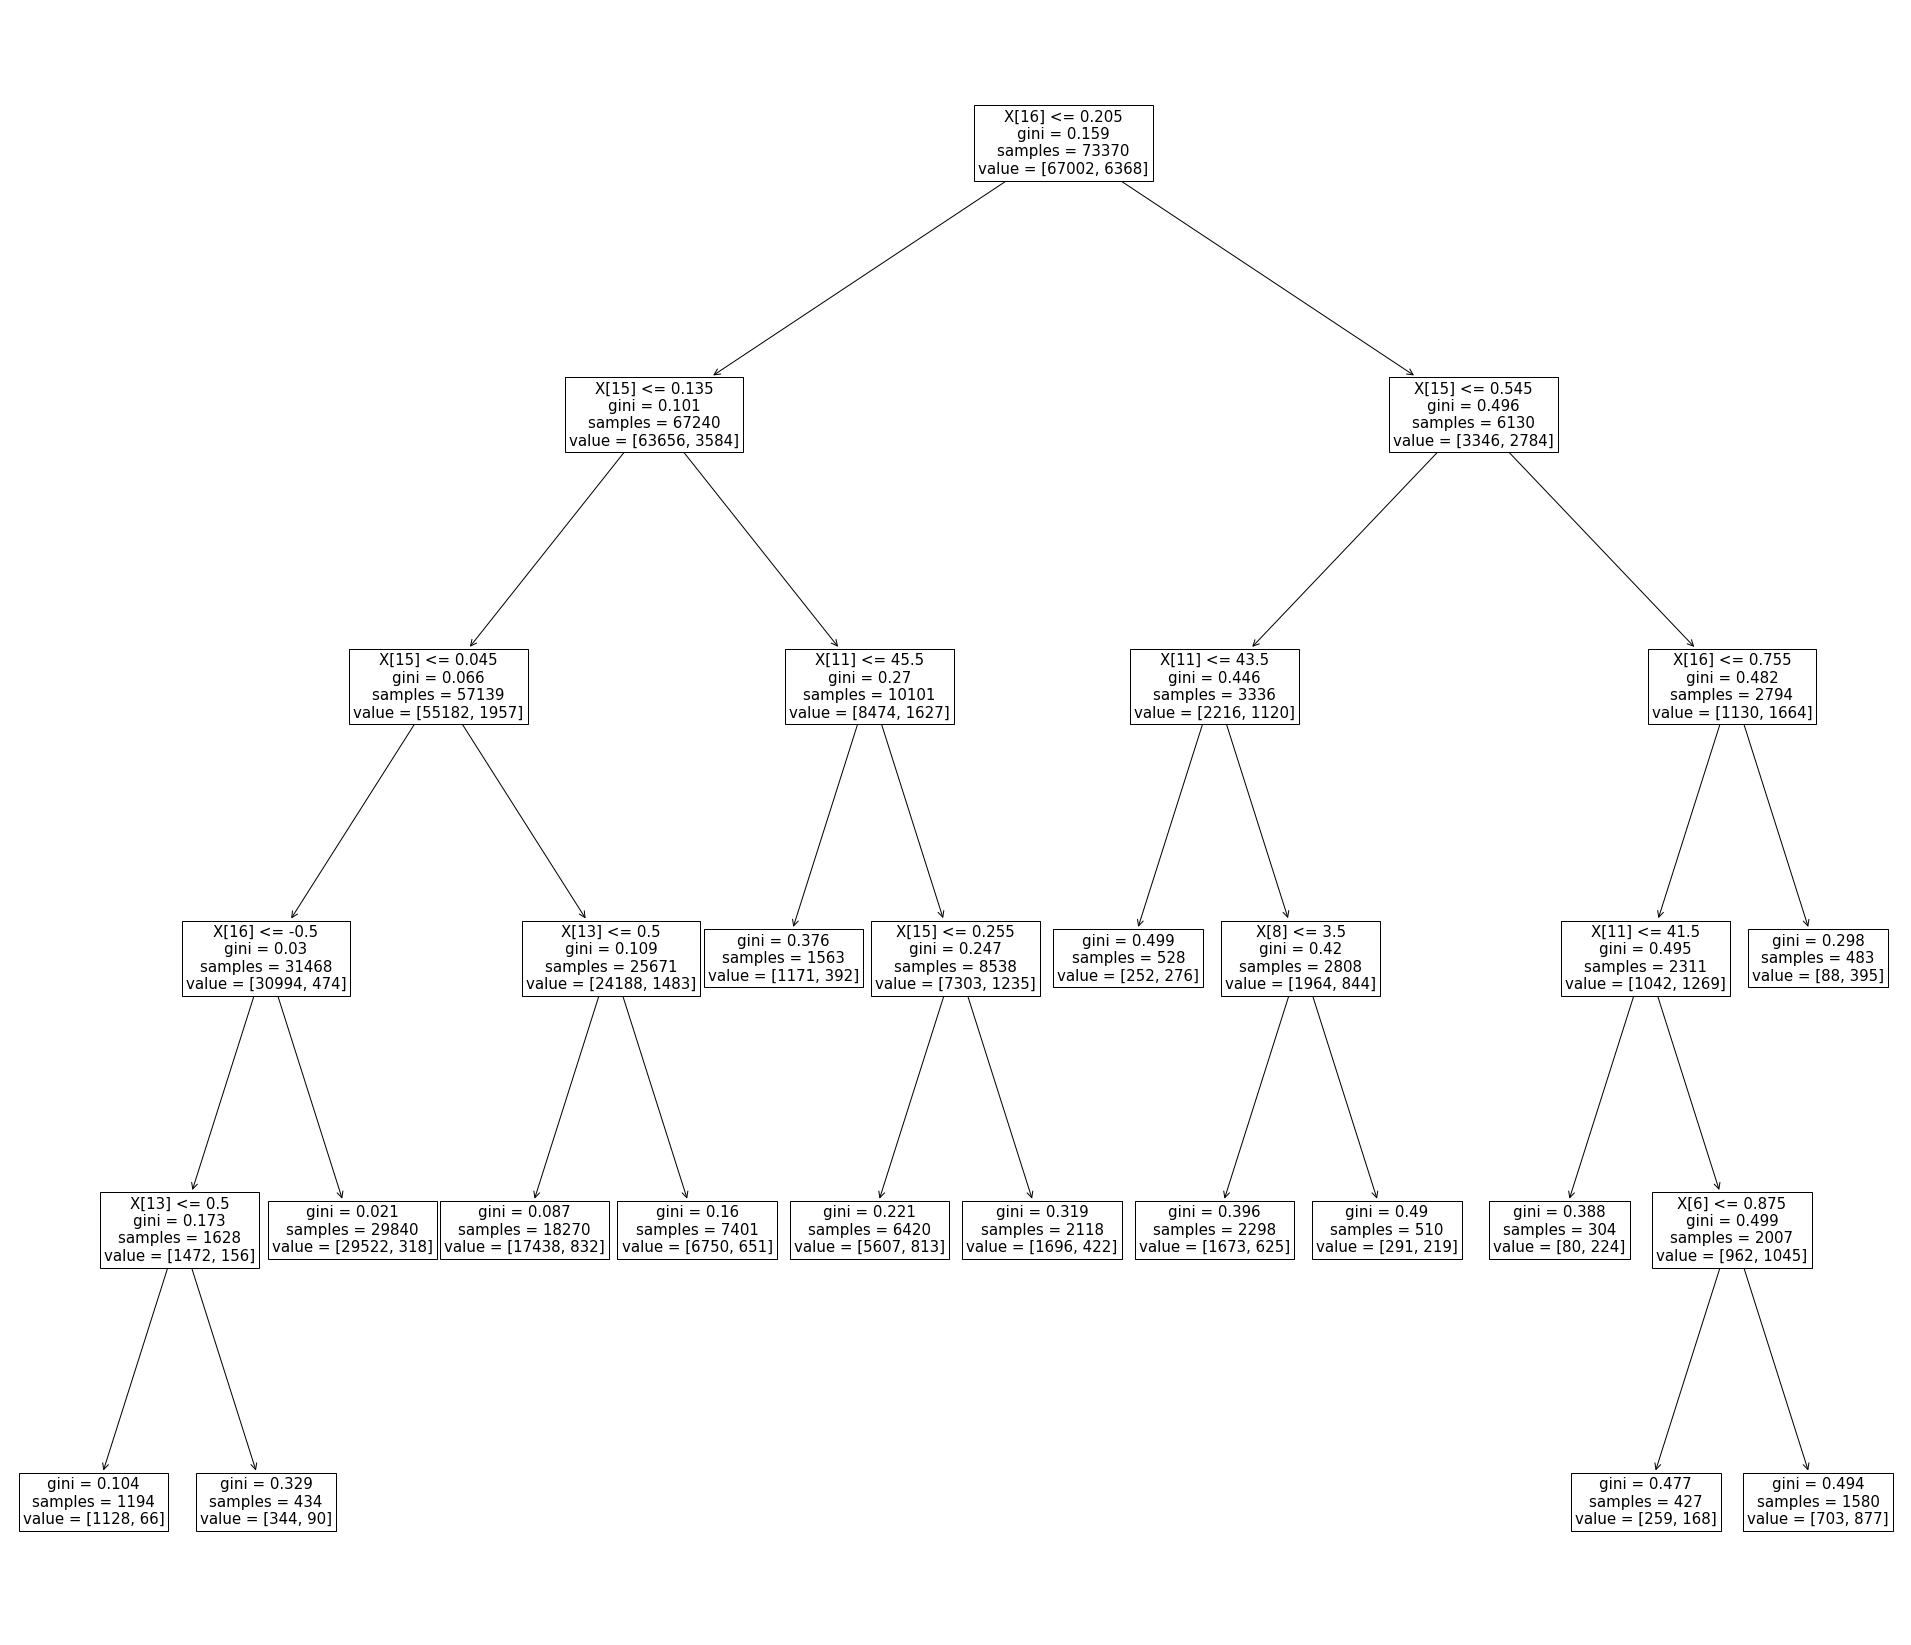

In [144]:
dt=DecisionTreeClassifier(max_leaf_nodes=15)
plt.figure(figsize=(34,30))
plot_tree(dt.fit(X_train,y_train),fontsize=15)
plt.show()

#### 3.a).10. Important features:

In [145]:
features_imp=pd.DataFrame({'Features':X_train.columns,'Score':dt.feature_importances_})
features_imp[features_imp['Score']>0]

,Features,Score
6,creatinine_apache,0.006740
8,gcs_verbal_apache,0.007941
11,map_apache,0.037733
13,ventilated_apache,0.012928
15,apache_4a_hospital_death_prob,0.211007
16,apache_4a_icu_death_prob,0.723651


From the Decision Tree Model we have found out The features which contribute significantly for the model. The features are:

    * creatinine_apache
    * gcs_verbal_apache
    * map_apache
    * ventilated_apache
    * apache_4a_hospital_death_prob
    * apache_4a_icu_death_prob

## 3.b) Inferences for Decision Tree Classification Model:

* The Cross entropy for the Decision Tree model is 4.19


* ROC AUC Score for the Decision Tree Model is 63.89


* The Model Accuracy for the Decision Tree Model is coming out to be around 88%.


* f1 weighted avg for the Decision Tree Model is around 88%.


* Specificity : 92%


* Sensitivity : 34%

# 4. Naive Bayes Classification Model using Scikit-learn:

In [146]:
# Classification Model using sklearn:
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred_test_NB=NB.predict(X_test)
y_pred_train_NB=NB.predict(X_train)
y_test_prob_NB=NB.predict_proba(X_test)[:,1]

## 4.a) Model Performance Evaluation:

## 4.a).1. Confusion Matrix for Naive Bayes classification

In [147]:
# Computing the Confusion matrix:

NB_confusion_mat=confusion_matrix(y_test,y_pred_test_dt)
tn = NB_confusion_mat[0,0]
tp = NB_confusion_mat[1,1]
fp = NB_confusion_mat[0,1]
fn = NB_confusion_mat[1,0]
print('Confusion Matrix for Decision Tree Model : ')
print('------------------------------------------------','\n')
print(NB_confusion_mat)

Confusion Matrix for Decision Tree Model : 
------------------------------------------------ 

[[15586  1210]
 [ 1022   525]]


#### 4.a).2. Graphical Representation of Confusion Matrix:

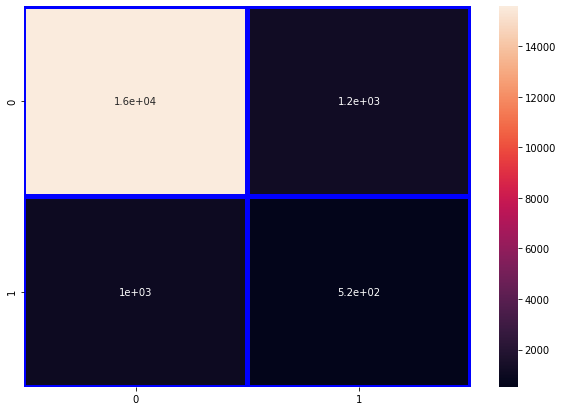

In [148]:
plt.figure(figsize=(10,7))
sns.heatmap(NB_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 4.a).3. Sensitivity and Specificity:

In [149]:
Sensitivity_NB=(tp/(tp+fn))
print('Sensitivity of the Naive Bayes Model: ')
print('-------------------------------------','\n')
print(Sensitivity_NB)
print('\n')
Specificity_NB=(tn/(tn+fp))
print('Specificity of the naive Bayes Model: ')
print('-------------------------------------','\n')
print(Specificity_NB)

Sensitivity of the Naive Bayes Model: 
------------------------------------- 

0.3393665158371041


Specificity of the naive Bayes Model: 
------------------------------------- 

0.9279590378661586


#### 4.a).4. Accuracy Analysis:

In [150]:
print('The Accuracy score of test data for the Naive Bayes Model: ')
print(accuracy_score(y_test,y_pred_test_NB),'\n')
print('The Accuracy score of the train data for the Naive Bayes Model: ')
print(accuracy_score(y_train,y_pred_train_NB))

The Accuracy score of test data for the Naive Bayes Model: 
0.8324156353922477 

The Accuracy score of the train data for the Naive Bayes Model: 
0.8347553495979283


#### 4.a).5. Naive Bayes Model classification report:

In [151]:
# Computing the classification report:

NB_reporttrain=classification_report(y_train,y_pred_train_NB)
print('Naive Bayes Model classification report for train data: ')
print('------------------------------------------------------','\n')
print(NB_reporttrain)
NB_reporttest=classification_report(y_test,y_pred_test_NB)
print('Naive Bayes Model classification report for test data: ')
print('------------------------------------------------------','\n')
print(NB_reporttest)

Naive Bayes Model classification report for train data: 
------------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     67002
           1       0.26      0.48      0.33      6368

    accuracy                           0.83     73370
   macro avg       0.60      0.67      0.62     73370
weighted avg       0.89      0.83      0.86     73370

Naive Bayes Model classification report for test data: 
------------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.95      0.87      0.90     16796
           1       0.24      0.47      0.32      1547

    accuracy                           0.83     18343
   macro avg       0.59      0.67      0.61     18343
weighted avg       0.89      0.83      0.86     18343



#### 4.a).6. ROC Curve for Naive Bayes Model:

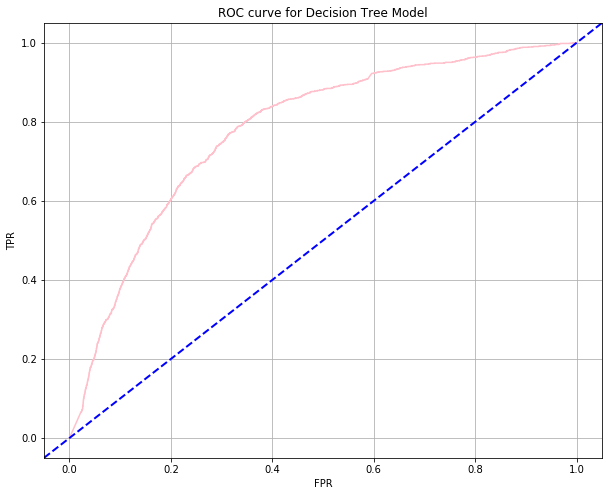

In [152]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_NB)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='pink')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve for Decision Tree Model')
plt.plot([-0.05,1.05],[-0.05,1.05],'b--',linewidth=2)
plt.show()

#### 4.a).7. ROC AUC Score:

In [153]:
print('The ROC AUC score of the Decision Tree Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_NB))

The ROC AUC score of the Decision Tree Model 
-------------------------------------------------- 

ROC AUC :  0.7795921875079378


#### 4.a).8. Cross Entropy:

In [154]:
cross_entropyNB=log_loss(y_test,y_pred_test_NB)
print('The Cross Entropy score of Naive Bayes Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropyNB)

The Cross Entropy score of Naive Bayes Model 
---------------------------------------------------- 

Cross Entropy :  5.788256977166951


#### 4.a).9. Bias Error and Variance Error:

In [155]:
k=KFold(n_splits=10,shuffle=True, random_state=10)
scores=cross_val_score(estimator=NB,X=X_train,y=y_train,cv=k,scoring='accuracy')
print("Mean Score : ",np.mean(scores))
print("Bias error : ",(1-np.mean(scores))*100)
print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')

Mean Score :  0.834823497342238
Bias error :  16.517650265776197
Variance error :  0.6610201696868194 



                  Overall Inference:         

# Tabular representation of derived Inferences:

## Model Comparison:

In [156]:
# Initializing the structure of the table:

columns=['Overall Accuracy Score','Accuracy for train data','Accuracy for test data','Specificity',
         'Sensitivity','f1 score weighted avg','ROC AUC Score','Cross Entropy']
indexes=['Logistic Regresion Model','K-Nearest Neighbors Model','Descision Tree Model','Naive Bayes Model']

In [157]:
# Creating a Dataframe for compariosn of Models:
model_data=pd.DataFrame(columns=columns,index=indexes)

# Inserting observed readings to the data fields:
model_data['Overall Accuracy Score']=['92%','91%','88%','83%']
model_data['Accuracy for train data']=['91.66%','93.01%','99.90%','83.47%']
model_data['Accuracy for test data']=['91.96%','90.28%','87.86%','83.24%']
model_data['Specificity']=['98.52%','98.44%','88%','92.80%']
model_data['Sensitivity']=['20.74%','10.34%','34.19%','34%']
model_data['f1 score weighted avg']=['90%','91%','88%','86%']
model_data['ROC AUC Score']=[79.55,66.86,63.89,77.95]
model_data['Bias Error']=['8.37','9.12','12.35','16.51']
model_data['Variance Error']=['42.05','31.38','42.54','66.10']
model_data['Cross Entropy']=[2.77,3.10,4.19,5.7]
model_data

,Overall Accuracy Score,Accuracy for train data,Accuracy for test data,Specificity,Sensitivity,f1 score weighted avg,ROC AUC Score,Cross Entropy,Bias Error,Variance Error
Logistic Regresion Model,92%,91.66%,91.96%,98.52%,20.74%,90%,79.55,2.77,8.37,42.05
K-Nearest Neighbors Model,91%,93.01%,90.28%,98.44%,10.34%,91%,66.86,3.10,9.12,31.38
Descision Tree Model,88%,99.90%,87.86%,88%,34.19%,88%,63.89,4.19,12.35,42.54
Naive Bayes Model,83%,83.47%,83.24%,92.80%,34%,86%,77.95,5.70,16.51,66.10


# Inferences based on comparison of Base Models:


#### 1. Overall Accuracy Score: 

    1. Logistic Regression Model has the highest overall accuracy of about 92%.

    2. Decision Tree Model yeilds the lowest overall model accuracy of about 88%.

#### 2. Overfitting/Underfitting:

    1. All the classification models exhibit overfitting of the trained data with respect to the test data.

    2. The model accuracy for train data and test data for both Logistic Regression Model and K-Nearest Neighbors Model has very less overfitting.
    
    3. As observed,the model accuracy for train data and test data for the Decision Tree Model has a considerably high difference in accuracies which can be considered a high overfitting condition in comparison to other models.

#### 3. f1 score weighted avg:

    1. The Logistic Regression Model has the highest weighted harmonic mean between precison and recall of about 91% based on the classification report.
    
    2. Both K-Nearest Neighbors Model and Descision Tree Model have nearly similar weighted harmonic mean between precison and recall of about 88%.
    
    3. We can further look at the recall values of the positive class and negative class to get more insights on the specificity and sensitivity.

#### Sensitivity and Specificity:

    1. Logistic Regression Model :
      * Specificity = 98.52%
      * Sensitivity = 20.74% 
    
    2. K-Nearest Neigbors Model :
      * Specificity = 98.44%
      * Sensitivity = 10.34% 
    
    3. Decision Tree Model :
      * Specificity = 88%
      * Sensitivity = 34.19% 

#### 5. ROC AUC Score:

    1. The Logistic Regression Model has the maximum area under the ROC curve with a ROC AUC Score of 79.55.
    
    2. The Decision Tree Model has the minimum area under the ROC curve with a ROC AUC Score of 63.89.

#### 6. Cross Entropy:

    1. Minimum Cross Entropy score for Logistic Regression model : 
    H_logistic(y) = 2.77
    
    2. Maximum Cross Entropy score for Naive Bayes Model : 
    H_Decisiontree(y) = 5.70

                       MODEL OPTIMIZATION                                  

## 5. Random Forest Classification Model using Scikit-learn:

In [158]:
# Classification Model using sklearn:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_test_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]

## 5.a) Model Performance Evaluation:

#### 5.a).1. Confusion Matrix for Random Forest classification

In [159]:
# Computing the Confusion matrix:

rf_confusion_mat=confusion_matrix(y_test,y_pred_test_rf)
tn = rf_confusion_mat[0,0]
tp = rf_confusion_mat[1,1]
fp = rf_confusion_mat[0,1]
fn = rf_confusion_mat[1,0]
print('Confusion Matrix for Random Forest Model : ')
print('------------------------------------------------','\n')
print(rf_confusion_mat)

Confusion Matrix for Random Forest Model : 
------------------------------------------------ 

[[16589   207]
 [ 1171   376]]


#### 5.a).2. Graphical Representation of Confusion Matrix:

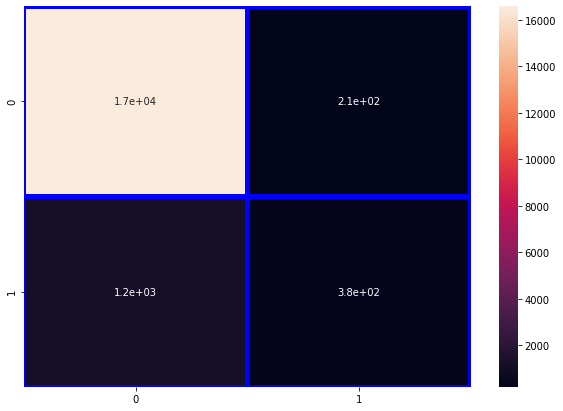

In [160]:
plt.figure(figsize=(10,7))
sns.heatmap(rf_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 5.a).3. Sensitivity and Specificity:

In [161]:
Sensitivity_random_forest=(tp/(tp+fn))
print('Sensitivity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_random_forest)
print('\n')
Specificity_random_forest=(tn/(tn+fp))
print('Specificity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Specificity_random_forest)

Sensitivity of the Decision Tree Model: 
--------------------------------------------- 

0.24305106658047834


Specificity of the Decision Tree Model: 
--------------------------------------------- 

0.987675637056442


#### 5.a).4. Accuracy Analysis:

In [162]:
print('The Accuracy score of test data for the Random Forest Model: ')
print(accuracy_score(y_test,y_pred_test_rf),'\n')
print('The Accuracy score of the train data for the Random Forest Model: ')
print(accuracy_score(y_train,y_pred_train_rf))

The Accuracy score of test data for the Random Forest Model: 
0.92487597448618 

The Accuracy score of the train data for the Random Forest Model: 
0.9990459315796647


#### 4.a).5. Random Forest Model classification report:

In [163]:
# Computing the classification report:

rf_reporttrain=classification_report(y_train,y_pred_train_rf)
print('Random Forest Model classification report for train data: ')
print('---------------------------------------------------------','\n')
print(rf_reporttrain)
rf_report=classification_report(y_test,y_pred_test_rf)
print('Random Forest Model classification report for test data: ')
print('--------------------------------------------------------','\n')
print(rf_report)

Random Forest Model classification report for train data: 
--------------------------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67002
           1       1.00      0.99      0.99      6368

    accuracy                           1.00     73370
   macro avg       1.00      0.99      1.00     73370
weighted avg       1.00      1.00      1.00     73370

Random Forest Model classification report for test data: 
-------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16796
           1       0.64      0.24      0.35      1547

    accuracy                           0.92     18343
   macro avg       0.79      0.62      0.66     18343
weighted avg       0.91      0.92      0.91     18343



#### 4.a).6. ROC Curve for Random Forest Model:

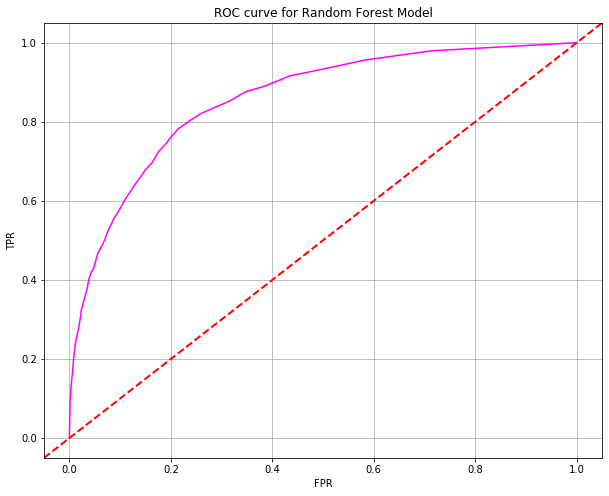

In [164]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_rf)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='magenta')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve for Random Forest Model')
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 4.a).7. ROC AUC Score:

In [165]:
print('The ROC AUC score of the Random Forest Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_rf))

The ROC AUC score of the Random Forest Model 
-------------------------------------------------- 

ROC AUC :  0.8572946655350728


#### 4.a).8. Cross Entropy:

In [166]:
cross_entropy=log_loss(y_test,y_pred_test_rf)
print('The Cross Entropy score of Random Forest Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of Random Forest Model 
---------------------------------------------------- 

Cross Entropy :  2.5947009425314826


#### 4.a).9. Bias Error and Variance Error:

In [167]:
k=KFold(n_splits=10,shuffle=True, random_state=10)
scores=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=k,scoring='accuracy')
print("Mean Score : ",np.mean(scores))
print("Bias error : ",(1-np.mean(scores))*100)
print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')

Mean Score :  0.9234973422379721
Bias error :  7.650265776202792
Variance error :  0.4208692405474239 



                        Optimization

## Hyperparameter Tunning Base models to find out best parameters for further optimization:

Each base model has been chosen and a set of parameters has been considered for fine tuning.
Using these set of parameters we have used ``Grid Search Cross Validation`` technique for Hyperparameter tunning the models where the Cross Validation considered is 10-Fold Cross Validation. 

In [168]:
tune_params=[{'penalty':['l1','l2','elasticnet'],'max_iter':[100, 110, 120, 150, 180, 200],
             }]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=LogisticRegression(),
                     param_grid=tune_params,cv=k,scoring='f1_weighted')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

{'max_iter': 200, 'penalty': 'l2'}

#### Tuning the Decision Tree Model:

In [169]:
tune_params=[{'criterion':['entropy', 'gini'],'splitter':['best','random'],
 'max_depth': np.arange(0, 200, 10),
 'min_samples_split':[2, 5, 8, 10, 20]}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tune_params,cv=k,scoring='f1_weighted')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 8,
 'splitter': 'random'}

#### Tuning the KNNeighbours Classification Model:

In [ ]:
tune_params=[{'n_neighbors':[5,6,7,8],'weights':['uniform','distance'],
 'algorithm':['auto'],
 'leaf_size':np.arange(30, 50, 10)}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid=tune_params,cv=k,scoring='f1_weighted')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

#### Tunning the Random Forest Model:

In [ ]:
tune_params=[{'criterion':['entropy', 'gini'],
    'n_estimators': [100,200,400,800,1200],'random_state':[10],
 'max_depth': np.arange(0, 100, 10),'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split':[2, 5, 10, 20]}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=tune_params,cv=k,scoring='f1_weighted')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

# Refitting the Tunned Based models to compare the performances: 

Overall accuracy of LogisticRegression(max_iter=200) for resampled train data :  92.0
Overall accuracy of LogisticRegression(max_iter=200) for resampled test data :  92.0 

Confusion Matrix for LogisticRegression(max_iter=200) Model : 
[[16607   189]
 [ 1271   276]] 

Sensitivity :  17.84
Specificity :  98.87 

Classification report of LogisticRegression(max_iter=200) for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     67002
           1       0.60      0.18      0.28      6368

    accuracy                           0.92     73370
   macro avg       0.77      0.59      0.62     73370
weighted avg       0.90      0.92      0.90     73370
 

Classification report of LogisticRegression(max_iter=200) for resampled test data : 
------------------------------------------------------------------------------- 

              precision

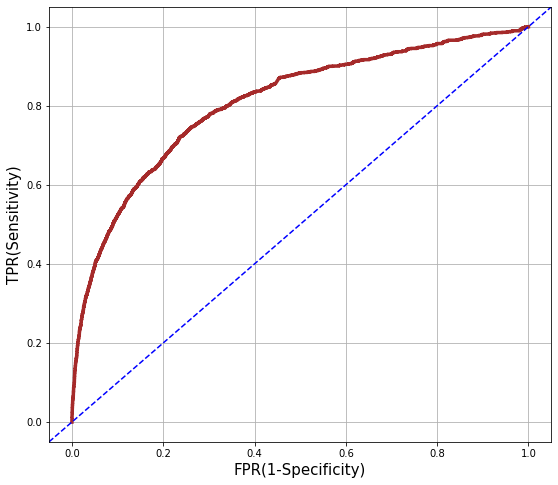

AUC Score of LogisticRegression(max_iter=200) for resampled test data : 
0.8071950866191092 

The Cross Entropy score of LogisticRegression(max_iter=200) Model :  2.749101273536712 

Mean Score :  0.91819544773068
Bias error :  8.180455226932004
Variance error :  0.3830056625785575 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled train data :  93.0
Overall accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled test data :  92.0 

Confusion Matrix for DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') Model : 
[[16538   258]
 [ 1222   325]] 

Sensitivity :  21.01
Specificity :  98.46 

Classificat

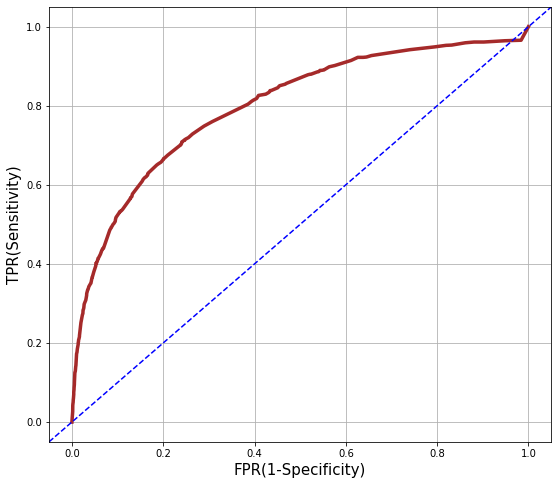

AUC Score of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled test data : 
0.7981426573230644 

The Cross Entropy score of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') Model :  2.786763090040059 

Mean Score :  0.9194221071282541
Bias error :  8.057789287174588
Variance error :  0.376530581991757 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of KNeighborsClassifier(n_neighbors=6, weights='distance') for resampled train data :  100.0
Overall accuracy of KNeighborsClassifier(n_neighbors=6, weights='distance') for resampled test data :  91.0 

Confusion Matrix for KNeighborsClassifier(n_neighbors=6, weights='distance') Model : 
[[16533   263]
 [ 1391   156]] 

Sensitivity :  10.08
Specificity :  98.43 

Classification report of KNe

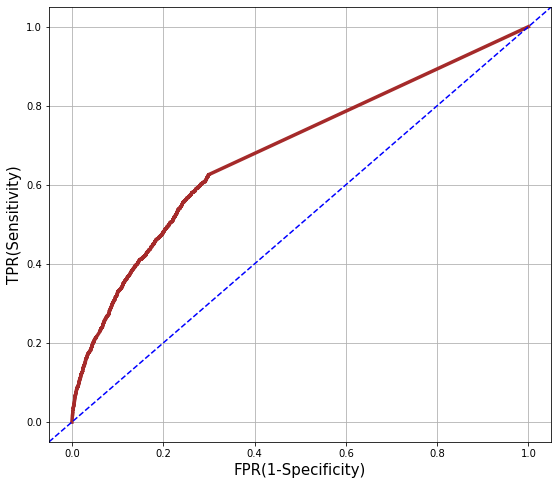

AUC Score of KNeighborsClassifier(n_neighbors=6, weights='distance') for resampled test data : 
0.6851508377729608 

The Cross Entropy score of KNeighborsClassifier(n_neighbors=6, weights='distance') Model :  3.1143949436464275 

Mean Score :  0.9087637999182228
Bias error :  9.123620008177724
Variance error :  0.36108515664203916 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of GaussianNB() for resampled train data :  83.0
Overall accuracy of GaussianNB() for resampled test data :  83.0 

Confusion Matrix for GaussianNB() Model : 
[[14546  2250]
 [  824   723]] 

Sensitivity :  46.74
Specificity :  86.6 

Classification report of GaussianNB() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     67002
           1       0.26      

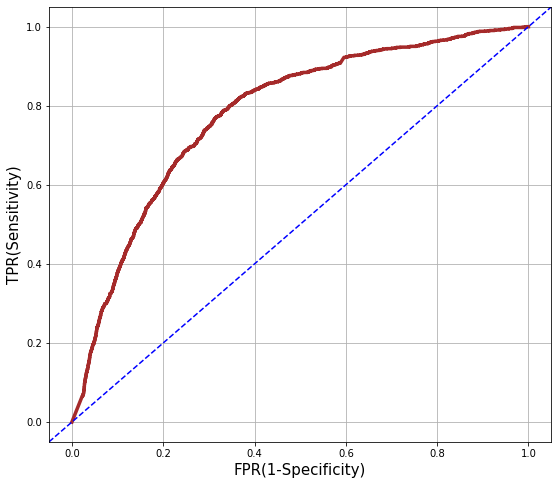

AUC Score of GaussianNB() for resampled test data : 
0.7795921875079378 

The Cross Entropy score of GaussianNB() Model :  5.788256977166951 

Mean Score :  0.834823497342238
Bias error :  16.517650265776197
Variance error :  0.6610201696868194 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of RandomForestClassifier() for resampled train data :  100.0
Overall accuracy of RandomForestClassifier() for resampled test data :  93.0 

Confusion Matrix for RandomForestClassifier() Model : 
[[16597   199]
 [ 1164   383]] 

Sensitivity :  24.76
Specificity :  98.82 

Classification report of RandomForestClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67002
           1       1.00      0.99      0.99      6368

    accuracy

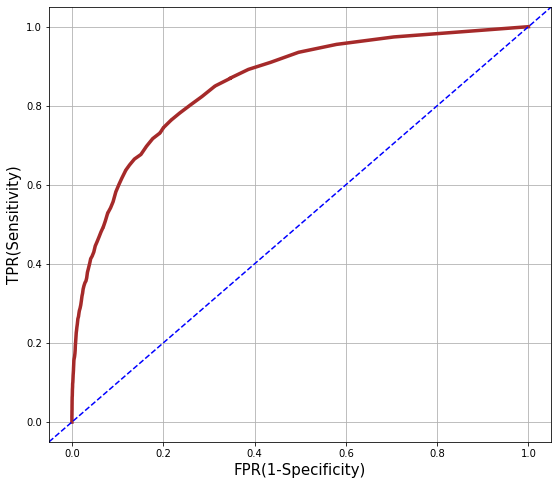

AUC Score of RandomForestClassifier() for resampled test data : 
0.8544134619425655 

The Cross Entropy score of RandomForestClassifier() Model :  2.566456487278628 

Mean Score :  0.9240288946435872
Bias error :  7.597110535641283
Variance error :  0.3607123778455788 

---------------------------------------------------------------------------------------------------------------------------- 



In [173]:
def tunned_basemodels(model):
    for j in model:
        plt.figure(figsize=(9,8))
        Tuned_base_model=j.fit(X_train,y_train)
        ypred_train=Tuned_base_model.predict(X_train)
        ypred_test=Tuned_base_model.predict(X_test)
        ypred_test_prob=Tuned_base_model.predict_proba(X_test)
        print(f'Overall accuracy of {j} for resampled train data : ',
        np.round(accuracy_score(y_train,ypred_train),2)*100)
        print(f'Overall accuracy of {j} for resampled test data : ',
        np.round(accuracy_score(y_test,ypred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(y_test,ypred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print(f'Confusion Matrix for {j} Model : ')
        print(confusion_mat,'\n')
        Sensitivity=((tp/(tp+fn))*100)
        print('Sensitivity : ',np.round(Sensitivity,2))
        Specificity=((tn/(tn+fp))*100)
        print('Specificity : ',np.round(Specificity,2),'\n')
        print(f'Classification report of {j} for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(y_train,ypred_train),'\n')
        print(f'Classification report of {j} for resampled test data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(y_test,ypred_test),'\n')
        fpr,trp,th=roc_curve(y_test,ypred_test_prob[:,1])
        plt.plot(fpr,trp,color='brown',linewidth=3.5)
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--b')
        plt.show()
        print(f'AUC Score of {j} for resampled test data : ')
        print(roc_auc_score(y_test,ypred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(y_test,ypred_test)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=X_train,y=y_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
models=[LogisticRegression(max_iter=200,penalty='l2'),DecisionTreeClassifier(criterion='entropy',
 max_depth=10,min_samples_split=8,splitter='random'),
        KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=6,weights='distance'),
        GaussianNB(),RandomForestClassifier()]
tunned_basemodels(models)

Logistic Regression, Decision tree and Random Forest.

### Checking presence of Imbalance in the target variable (hospital_death) :

Checking % of subcatgories in the Target variable(hospital_death):  

% of Positive class(0) : 
91.36981671082617 

% of Negative class(1) : 
8.630183289173836


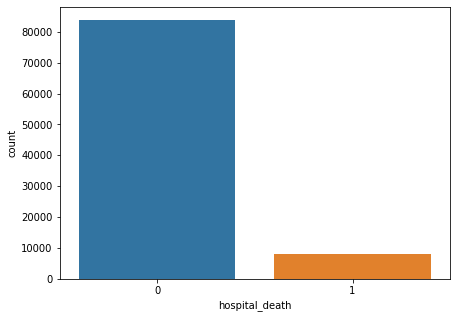

In [174]:
print('Checking % of subcatgories in the Target variable(hospital_death): ','\n')
print('% of Positive class(0) : ',)
print((patient_records['hospital_death'].value_counts()[0]/patient_records['hospital_death'].shape[0])*100,'\n')
print('% of Negative class(1) : ',)
print((patient_records['hospital_death'].value_counts()[1]/patient_records['hospital_death'].shape[0])*100)
plt.figure(figsize=(7,5))
sns.countplot(patient_records['hospital_death'])

Thus we can see that their is imbalance present in the target variable (hospital_death).

* 91.37% of 0 class which is the majority class.
* 8.63% of 1 class which is the minority class.

Presence of class imbalance in the target feature can be a defect which might result in faulty predictions by the classification algorithm with a tendency to classify the testing data more towards the majority class.


Thus, in order to remove Imablance we will use SMOTE analysis or the Synthetic Minority OverSampling Technique by which new examples can be synthesized from the existing examples. This type of data augmentation for the minority class can reduce the huge difference between the % distribution of each unique sub-category in the target variable.

### SMOTE Analysis:

In [175]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

Resampled X : (163406, 24)
Resampled y : (163406, 1) 

Checking % of subcatgories in the Target variable(y) after SMOTE analysis:  

% of Positive class(0) :  51.28
% of Negative class(1) :  48.72 

XRes_train : (130724, 24)
yRes_train : (130724, 1)
XRes_test : (32682, 24)
yRes_test : (32682, 1)


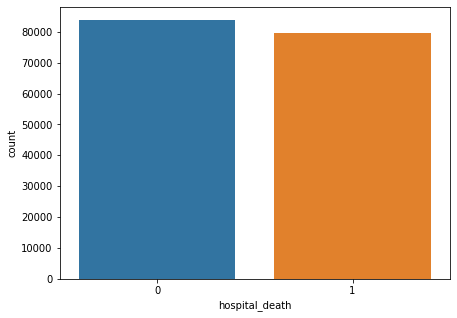

In [176]:
# Performing SMOTE to reduce imbalance:
 
smote=SMOTE(sampling_strategy=0.95,random_state=10)
X_res, y_res = smote.fit_resample(X,y)
print('Resampled X :',X_res.shape)
print('Resampled y :',y_res.shape,'\n')
# Checking the resampled data:
print('Checking % of subcatgories in the Target variable(y) after SMOTE analysis: ','\n')
print('% of Positive class(0) : ',np.round(((y_res['hospital_death'].value_counts()[0]/y_res['hospital_death'].shape[0])*100),2))
print('% of Negative class(1) : ',np.round((y_res['hospital_death'].value_counts()[1]/y_res['hospital_death'].shape[0])*100,2),'\n')
plt.figure(figsize=(7,5))
sns.countplot(y_res['hospital_death'])

# Splitting the dataset into train and test in the ratio 80:20
rs=10
XRes_train,XRes_test,yRes_train,yRes_test=train_test_split(X_res,y_res,test_size=0.2,random_state=rs)
print('XRes_train :',XRes_train.shape)
print('yRes_train :',yRes_train.shape)
print('XRes_test :',XRes_test.shape)
print('yRes_test :',yRes_test.shape)

# Refitting Logistic Regression, Decision tree, Random Forest algorithm on Resampled data:

##### Classification Model using sklearn on resampled datset:

In [182]:
def Random_forest_classifier(model):
    for j in model:
        res_base_models=j.fit(XRes_train,yRes_train)
        yRes_pred_test_rf=res_base_models.predict(XRes_test)
        yRes_pred_train_rf=res_base_models.predict(XRes_train)
        yRes_test_prob_rf=res_base_models.predict_proba(XRes_test)[:,1]
        print(f'The Accuracy score of resampled test data for the {j} Model: ')
        print(accuracy_score(yRes_test,yRes_pred_test_rf))
        print(f'The Accuracy score of resampled train data for the {j} Model: ')
        print(accuracy_score(yRes_train,yRes_pred_train_rf),'\n')
        rfRes_confusion_mat=confusion_matrix(yRes_test,yRes_pred_test_rf)
        tn = rfRes_confusion_mat[0,0]
        tp = rfRes_confusion_mat[1,1]
        fp = rfRes_confusion_mat[0,1]
        fn = rfRes_confusion_mat[1,0]
        print(f'Confusion Matrix of {j} Model for resampled test data : ')
        print('-----------------------------------------------------------------','\n')
        print(rfRes_confusion_mat,'\n')
        rfRes_reporttrain=classification_report(yRes_train,yRes_pred_train_rf)
        print(f'{j} Model classification report after resampling for train data: ')
        print('------------------------------------------------------------------------','\n')
        print(rfRes_reporttrain,'\n')
        rfRes_reporttest=classification_report(yRes_test,yRes_pred_test_rf)
        print(f'{j} Model classification report after resampling for test data: ')
        print('------------------------------------------------------------------------','\n')
        print(rfRes_reporttest,'\n')
        Sensitivity=(tp/(tp+fn))
        print('Sensitivity : ',Sensitivity)
        Specificity=(tn/(tn+fp))
        print('Specificity : ',Specificity,'\n')
        print(f'AUC score of the {j} Model for resampled test data : ',
              roc_auc_score(yRes_test,yRes_test_prob_rf),'\n')
        cross_entropy=log_loss(yRes_test,yRes_pred_test_rf)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=XRes_train,y=yRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------','\n')
model=[LogisticRegression(max_iter=200,penalty='l2'),
        DecisionTreeClassifier(criterion='entropy',
 max_depth=10,min_samples_split=8,splitter='random'),RandomForestClassifier()]
Random_forest_classifier(model)

The Accuracy score of resampled test data for the LogisticRegression(max_iter=200) Model: 
0.7794198641454011
The Accuracy score of resampled train data for the LogisticRegression(max_iter=200) Model: 
0.7793978152443316 

Confusion Matrix of LogisticRegression(max_iter=200) Model for resampled test data : 
----------------------------------------------------------------- 

[[13668  3173]
 [ 4036 11805]] 

LogisticRegression(max_iter=200) Model classification report after resampling for train data: 
------------------------------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     66957
           1       0.79      0.75      0.77     63767

    accuracy                           0.78    130724
   macro avg       0.78      0.78      0.78    130724
weighted avg       0.78      0.78      0.78    130724
 

LogisticRegression(max_iter=200) Model classification report after resampling for test data

#### The Random Forest Model given by the function :  ``Random_forest_classifier(model)`` has better Precision and Recall than the previous model built with actual training data. 

# Feature Extraction:

In [183]:
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=None,step=1,verbose=0)
rfe_model=rfe.fit(XRes_train,yRes_train)
features_imp=pd.DataFrame({'Features':X_res.columns,
                           'Rank':rfe_model.ranking_}).sort_values(by='Rank',ascending=True)
print(features_imp[features_imp['Rank']==1],'\n'=;1
XRes_new=features_imp[features_imp['Rank']==1]
print(list(XRes_new['Features']))

                         Features  Rank
11                     map_apache     1
16       apache_4a_icu_death_prob     1
2              apache_2_diagnosis     1
3             apache_3j_diagnosis     1
15  apache_4a_hospital_death_prob     1
5                      bun_apache     1
6               creatinine_apache     1
14                     wbc_apache     1
8               gcs_verbal_apache     1
9                  glucose_apache     1
19              diabetes_mellitus     1
12                resprate_apache     1 

['map_apache', 'apache_4a_icu_death_prob', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 'bun_apache', 'creatinine_apache', 'wbc_apache', 'gcs_verbal_apache', 'glucose_apache', 'diabetes_mellitus', 'resprate_apache']


The following variables are obtained after Recurcise feature elimination:

    map_apache', 'apache_4a_icu_death_prob', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 'bun_apache', 'creatinine_apache', 'wbc_apache', 'gcs_verbal_apache', 'glucose_apache', 'diabetes_mellitus', 'resprate_apache'
    

# Refitting the Logistic Regression model, Decision Tree model, Naive Bayes and Random Forest model on the new dataset containing features obtained after recursive elimination:

In [184]:
X.head()

,const,elective_surgery,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,...,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma
0,1.0,0,113.0,502.01,0,31.0,2.51,0,4,168.0,...,14.1,0.10,0.05,0,0,1,0,0,0,0
1,1.0,0,108.0,203.01,0,9.0,0.56,0,1,145.0,...,12.7,0.47,0.29,0,0,1,0,0,0,0
2,1.0,0,122.0,703.03,0,19.0,0.98,0,5,133.0,...,10.4,0.00,0.00,0,0,0,0,0,0,0
3,1.0,1,203.0,1206.03,0,19.0,0.98,0,5,185.0,...,8.0,0.04,0.03,0,0,0,0,0,0,0
4,1.0,0,119.0,601.01,0,19.0,0.98,0,5,133.0,...,10.4,0.05,0.02,0,0,0,0,0,0,0


In [185]:
X.to_csv('Dataset.csv')

In [186]:
X.shape

(91713, 24)

Overall accuracy of LogisticRegression(max_iter=200) for resampled train data :  77.0
Overall accuracy of LogisticRegression(max_iter=200) for resampled test data :  77.0 

Confusion Matrix for LogisticRegression(max_iter=200) Model : 
[[13497  3344]
 [ 4188 11653]] 

Sensitivity :  0.7356227510889464
Specificity :  0.8014369693011104 

Classification report of LogisticRegression(max_iter=200) for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     66957
           1       0.78      0.73      0.76     63767

    accuracy                           0.77    130724
   macro avg       0.77      0.77      0.77    130724
weighted avg       0.77      0.77      0.77    130724
 

Classification report of LogisticRegression(max_iter=200) for resampled test data : 
-------------------------------------------------------------------------------

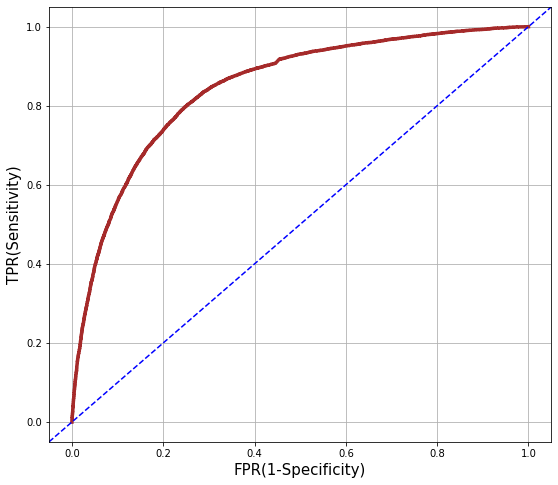

AUC Score of LogisticRegression(max_iter=200) for resampled test data : 
0.8460362783430635 

The Cross Entropy score of LogisticRegression(max_iter=200) Model :  7.960000540366987 

Mean Score :  0.7707077476670174
Bias error :  22.929225233298254
Variance error :  0.4329379219045872 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled train data :  82.0
Overall accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled test data :  81.0 

Confusion Matrix for DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') Model : 
[[13688  3153]
 [ 2901 12940]] 

Sensitivity :  0.816867621993561
Specificity :  0.81

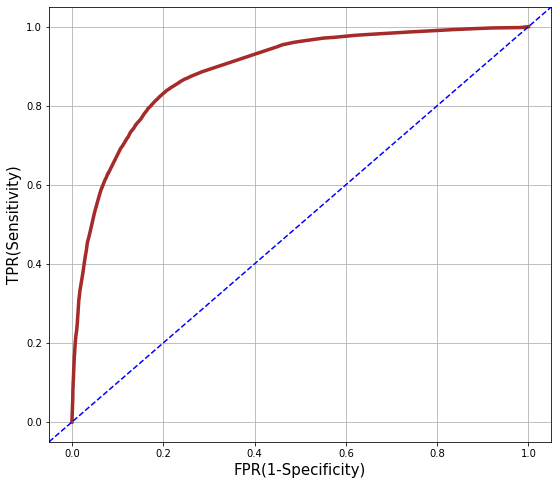

AUC Score of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') for resampled test data : 
0.8902472030697282 

The Cross Entropy score of DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       splitter='random') Model :  6.398025623446751 

Mean Score :  0.8210886500164175
Bias error :  17.89113499835825
Variance error :  1.155802329518426 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of RandomForestClassifier() for resampled train data :  100.0
Overall accuracy of RandomForestClassifier() for resampled test data :  94.0 

Confusion Matrix for RandomForestClassifier() Model : 
[[15593  1248]
 [  749 15092]] 

Sensitivity :  0.9527176314626602
Specificity :  0.925895136868357 

Classification report of RandomForestClassifier() for resampled train data : 
------------------

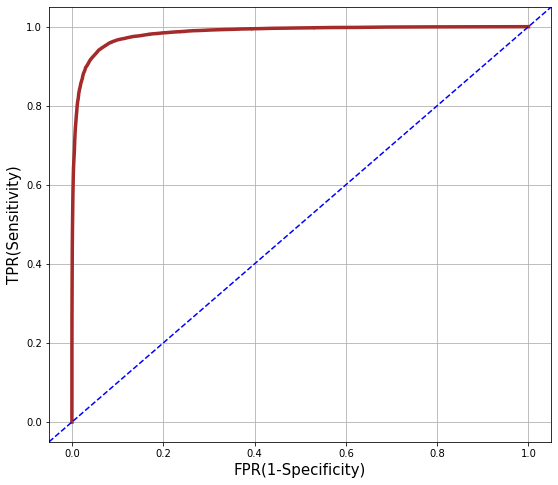

AUC Score of RandomForestClassifier() for resampled test data : 
0.984282423650522 

The Cross Entropy score of RandomForestClassifier() Model :  2.110486945665184 

Mean Score :  0.936836389899258
Bias error :  6.316361010074201
Variance error :  0.21689992465166508 

---------------------------------------------------------------------------------------------------------------------------- 



In [190]:
def model_imp_features(model):
    for j in model:
        X_new=X[['map_apache', 'apache_4a_icu_death_prob', 'apache_2_diagnosis', 
                 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 
                 'bun_apache', 'creatinine_apache', 'wbc_apache', 
                 'gcs_verbal_apache', 'glucose_apache', 'diabetes_mellitus', 'resprate_apache']]
        Y=patient_records['hospital_death']
        smt=SMOTE(sampling_strategy=0.95,random_state=10)
        Xnew_res, Y_res = smt.fit_resample(X_new,Y)
        XRes_train,XRes_test,YRes_train,YRes_test=train_test_split(Xnew_res,Y_res,test_size=0.2,random_state=10)
        plt.figure(figsize=(9,8))
        Res_new_model=j.fit(XRes_train,YRes_train)
        YRespred_train=Res_new_model.predict(XRes_train)
        YRespred_test=Res_new_model.predict(XRes_test)
        YRespred_test_prob=Res_new_model.predict_proba(XRes_test)
        print(f'Overall accuracy of {j} for resampled train data : ',
        np.round(accuracy_score(YRes_train,YRespred_train),2)*100)
        print(f'Overall accuracy of {j} for resampled test data : ',
        np.round(accuracy_score(YRes_test,YRespred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(YRes_test,YRespred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print(f'Confusion Matrix for {j} Model : ')
        print(confusion_mat,'\n')
        Sensitivity=(tp/(tp+fn))
        print('Sensitivity : ',Sensitivity)
        Specificity=(tn/(tn+fp))
        print('Specificity : ',Specificity,'\n')
        print(f'Classification report of {j} for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_train,YRespred_train),'\n')
        print(f'Classification report of {j} for resampled test data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_test,YRespred_test),'\n')
        fpr,trp,th=roc_curve(YRes_test,YRespred_test_prob[:,1])
        plt.plot(fpr,trp,color='brown',linewidth=3.5)
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--b')
        plt.show()
        print(f'AUC Score of {j} for resampled test data : ')
        print(roc_auc_score(YRes_test,YRespred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(YRes_test,YRespred_test)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=XRes_train,y=YRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
models=[LogisticRegression(max_iter=200,penalty='l2'),
        DecisionTreeClassifier(criterion='entropy',
 max_depth=10,min_samples_split=8,splitter='random'),RandomForestClassifier()]
model_imp_features(models)

From the above analysis it can be inferred that :
    
    * The Sensitivity and Specificity of both Logistic Regression model and Decision Tree model has increased significantly from the base models resulting in an improved weighted-avgerage of Precision and Recall rates.
    
    * The Decision Tree Model has a better overall performance than the Logistic Model for the new dataset obtained after recursive feature elimination and resampling the data.
    
    * The Random Forest Model has not shown any major improvement from the previous model but has the best overall performance as compared to the Logistic Regression and Decision Tree model.

 ## Conclusion 

Therefore we will be considering the Random Forest Classifier model.

Random Forest Model :
    
    * Overall accuracy of RandomForestClassifier() for resampled train data : 100.00
    * Overall accuracy of RandomForestClassifier() for resampled test data : 94.0
    * Sensitivity : 0.97
    * Specificity : 0.92
    * f1-score weighted average : 94%
    * AUC Score of RandomForestClassifier() for resampled test data : 0.9842
    * Bias Error : 6.316
    * variance error : 0.2168

# Boosting Algorithms on the selected features:

* AdaBoost Model
* GradientBoost Model
* XGBoost Model

Overall accuracy of AdaBoostClassifier() for resampled train data :  85.0
Overall accuracy of AdaBoostClassifier() for resampled test data :  85.0 

Confusion Matrix for AdaBoostClassifier() Model : 
[[14163  2678]
 [ 2142 13699]] 

Sensitivity :  0.8647812638091029
Specificity :  0.8409833145300161 

Classification report of AdaBoostClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     66957
           1       0.84      0.87      0.85     63767

    accuracy                           0.85    130724
   macro avg       0.85      0.86      0.85    130724
weighted avg       0.86      0.85      0.85    130724
 

Classification report of AdaBoostClassifier() for resampled test data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

  

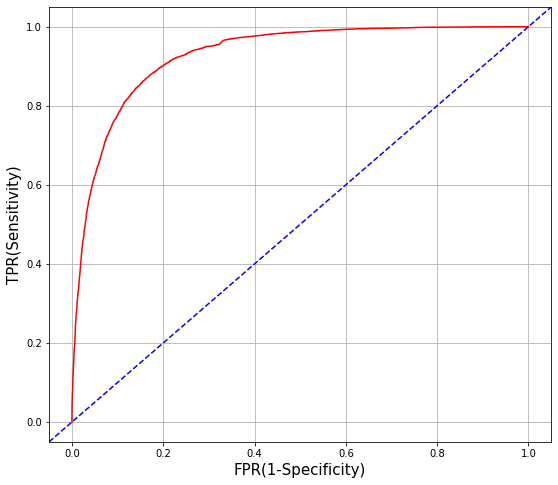

AUC Score for AdaBoostClassifier() for resampled test data : 
0.9277744034192948 

The Cross Entropy score of AdaBoostClassifier() Model :  5.093906234177455 

Mean Score :  0.8552140562069261
Bias error :  14.478594379307385
Variance error :  0.27860125804568026 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of GradientBoostingClassifier() for resampled train data :  88.0
Overall accuracy of GradientBoostingClassifier() for resampled test data :  88.0 

Confusion Matrix for GradientBoostingClassifier() Model : 
[[14637  2204]
 [ 1581 14260]] 

Sensitivity :  0.9001956947162426
Specificity :  0.8691289115848227 

Classification report of GradientBoostingClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     66957
       

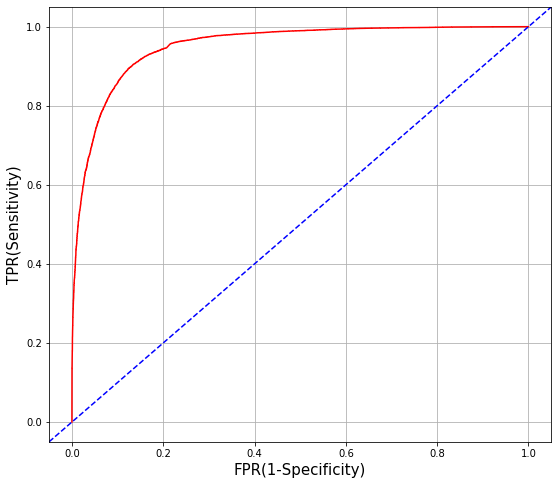

AUC Score for GradientBoostingClassifier() for resampled test data : 
0.9510644196706552 

The Cross Entropy score of GradientBoostingClassifier() Model :  4.000092741186987 

Mean Score :  0.8840075112298973
Bias error :  11.599248877010272
Variance error :  0.3036704502786237 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
      

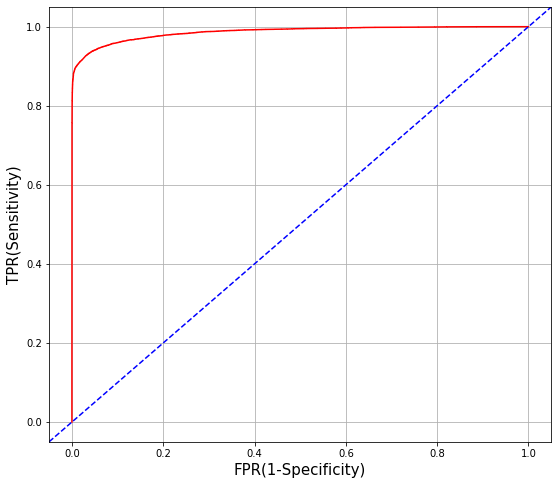

AUC Score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) for resampled test data : 
0.9861564517690254 

The Cross Entropy score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_d

In [192]:
def model_imp_boosting(model):
    for j in model:
        X_new=X[['map_apache', 'apache_4a_icu_death_prob', 'apache_2_diagnosis', 
                 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 
                 'bun_apache', 'creatinine_apache', 'wbc_apache', 
                 'gcs_verbal_apache', 'glucose_apache', 'diabetes_mellitus', 'resprate_apache']]
        Y=patient_records['hospital_death']
        smt=SMOTE(sampling_strategy=0.95,random_state=10)
        Xnew_res, Y_res = smt.fit_resample(X_new,Y)
        XRes_train,XRes_test,YRes_train,YRes_test=train_test_split(Xnew_res,Y_res,test_size=0.2,random_state=10)
        plt.figure(figsize=(9,8))
        Res_model=j.fit(XRes_train,YRes_train)
        YRespred_train=Res_model.predict(XRes_train)
        YRespred_test=Res_model.predict(XRes_test)
        YRespred_test_prob=Res_model.predict_proba(XRes_test)
        print(f'Overall accuracy of {j} for resampled train data : ',
        np.round(accuracy_score(YRes_train,YRespred_train),2)*100)
        print(f'Overall accuracy of {j} for resampled test data : ',
        np.round(accuracy_score(YRes_test,YRespred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(YRes_test,YRespred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print(f'Confusion Matrix for {j} Model : ')
        print(confusion_mat,'\n')
        Sensitivity=(tp/(tp+fn))
        print('Sensitivity : ',Sensitivity)
        Specificity=(tn/(tn+fp))
        print('Specificity : ',Specificity,'\n')
        print(f'Classification report of {j} for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_train,YRespred_train),'\n')
        print(f'Classification report of {j} for resampled test data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_test,YRespred_test),'\n')
        fpr,trp,th=roc_curve(YRes_test,YRespred_test_prob[:,1])
        plt.plot(fpr,trp,color='red')
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--b')
        plt.show()
        print(f'AUC Score for {j} for resampled test data : ')
        print(roc_auc_score(YRes_test,YRespred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(YRes_test,YRespred_test)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=XRes_train,y=YRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
boosting_classifier=[AdaBoostClassifier(),GradientBoostingClassifier(),
                     XGBClassifier(eval_metric='logloss')]
model_imp_boosting(boosting_classifier)

# Boosting Algorithms on complete Resampled data :

* AdaBoost Model
* GradientBoost Model
* XGBoost Model

Overall accuracy of AdaBoostClassifier() for resampled train data :  86.0
Overall accuracy of AdaBoostClassifier() for resampled test data :  86.0 

Confusion Matrix for AdaBoostClassifier() Model : 
[[14286  2555]
 [ 2171 13670]] 

Sensitivity :  0.8629505713023168
Specificity :  0.8482869188290482 

Classification report of AdaBoostClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     66957
           1       0.85      0.87      0.86     63767

    accuracy                           0.86    130724
   macro avg       0.86      0.86      0.86    130724
weighted avg       0.86      0.86      0.86    130724
 

Classification report of AdaBoostClassifier() for resampled test data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

  

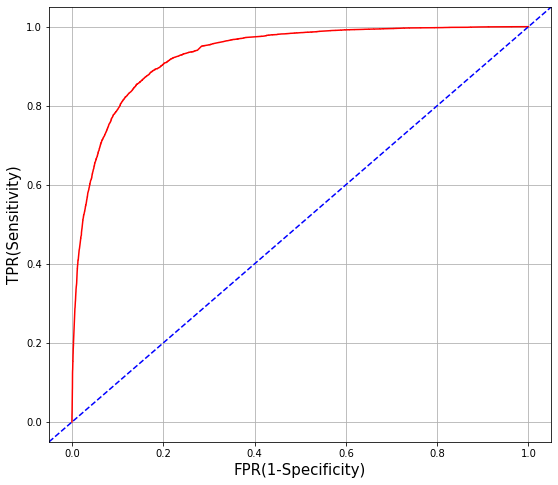

AUC Score for AdaBoostClassifier() for resampled test data : 
0.9314789384972461 

The Cross Entropy score of AdaBoostClassifier() Model :  4.994562762798545 

Mean Score :  0.8584116247096031
Bias error :  14.158837529039692
Variance error :  0.2409754682585434 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of GradientBoostingClassifier() for resampled train data :  89.0
Overall accuracy of GradientBoostingClassifier() for resampled test data :  88.0 

Confusion Matrix for GradientBoostingClassifier() Model : 
[[14662  2179]
 [ 1639 14202]] 

Sensitivity :  0.8965343097026703
Specificity :  0.8706133840033252 

Classification report of GradientBoostingClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     66957
        

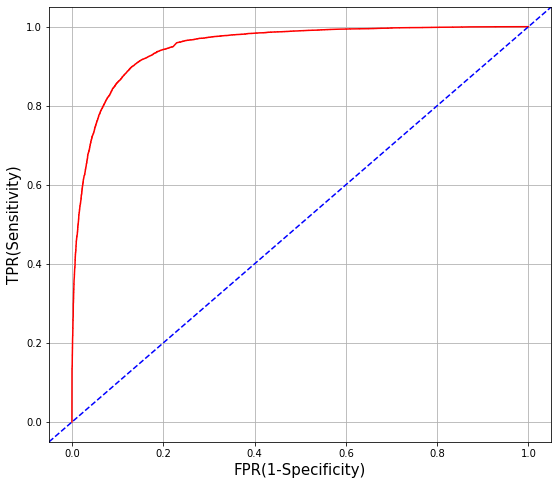

AUC Score for GradientBoostingClassifier() for resampled test data : 
0.9509837628048888 

The Cross Entropy score of GradientBoostingClassifier() Model :  4.034966972601719 

Mean Score :  0.8853691903884796
Bias error :  11.46308096115204
Variance error :  0.38090761368707693 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
      

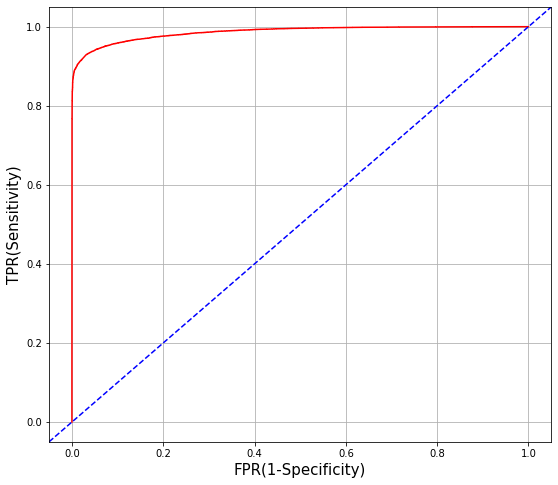

AUC Score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) for resampled test data : 
0.9860890662234982 

The Cross Entropy score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_d

In [193]:
def Res_boosting_algorithm(model):
    for j in model:
        plt.figure(figsize=(9,8))
        Res_xgboost_model=j.fit(XRes_train,yRes_train)
        yRespred_train=Res_xgboost_model.predict(XRes_train)
        yRespred_test=Res_xgboost_model.predict(XRes_test)
        yRespred_test_prob=Res_xgboost_model.predict_proba(XRes_test)
        print(f'Overall accuracy of {j} for resampled train data : ',
        np.round(accuracy_score(yRes_train,yRespred_train),2)*100)
        print(f'Overall accuracy of {j} for resampled test data : ',
        np.round(accuracy_score(yRes_test,yRespred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(yRes_test,yRespred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print(f'Confusion Matrix for {j} Model : ')
        print(confusion_mat,'\n')
        Sensitivity=(tp/(tp+fn))
        print('Sensitivity : ',Sensitivity)
        Specificity=(tn/(tn+fp))
        print('Specificity : ',Specificity,'\n')
        print(f'Classification report of {j} for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(yRes_train,yRespred_train),'\n')
        print(f'Classification report of {j} for resampled test data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(yRes_test,yRespred_test),'\n')
        fpr,trp,th=roc_curve(yRes_test,yRespred_test_prob[:,1])
        plt.plot(fpr,trp,color='red')
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--b')
        plt.show()
        print(f'AUC Score for {j} for resampled test data : ')
        print(roc_auc_score(yRes_test,yRespred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(yRes_test,yRespred_test)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=XRes_train,y=yRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
boosting_classifier=[AdaBoostClassifier(),GradientBoostingClassifier(),
                     XGBClassifier(eval_metric='logloss')]
Res_boosting_algorithm(boosting_classifier)

# Model Comparison:

In [194]:
# Initializing the structure of the table:
indexes=['Random Forest Model','AdaBoost Model','GradientBoost Model',
                     'XGBoost Model']
#  Dataframe for compariosn of Optimization Models:
optModel_data=pd.DataFrame(index=indexes)
# Inserting observed readings to the data fields:
optModel_data['Overall Accuracy']=['95%','86%','89%','96%']
optModel_data['Accuracy for train data']=['99.60%','86%','89%','95%']
optModel_data['Accuracy for test data']=['93.41%','86%','88%','95%']
optModel_data['Specificity']=['92.08%','84.82%','87.06%','96.24%']
optModel_data['Sensitivity']=['94.82%','86.29%','89.65%','93.31%']
optModel_data['f1 score weighted avg']=['93%','86%','89%','96%']
optModel_data['ROC AUC Score']=[0.98,0.93,0.95,0.98]
optModel_data['Bias Error']=[6.76,14.15,11.46,5.17]
optModel_data['Variance Error']=[0.27,0.24,0.30,0.22]
optModel_data['Cross Entropy']=[2.27,4.99,4.03,1.78]
optModel_data

,Overall Accuracy,Accuracy for train data,Accuracy for test data,Specificity,Sensitivity,f1 score weighted avg,ROC AUC Score,Bias Error,Variance Error,Cross Entropy
Random Forest Model,95%,99.60%,93.41%,92.08%,94.82%,93%,0.98,6.76,0.27,2.27
AdaBoost Model,86%,86%,86%,84.82%,86.29%,86%,0.93,14.15,0.24,4.99
GradientBoost Model,89%,89%,88%,87.06%,89.65%,89%,0.95,11.46,0.30,4.03
XGBoost Model,96%,95%,95%,96.24%,93.31%,96%,0.98,5.17,0.22,1.78


Based on the comparison we can definitely conclude that:
    
    * XGBoost Model and Random Forest Model have the approx  overall accuracy of 95% on test data.
    * XGBoost has less overfitting of train data as compared to Random Forest Model.
    * XGBoost has a slightly lesser Bias error and variance error than Random Forest Model.
    * f1-score weighted for XGBoost Model : 96%
    * AUC score for XGBoost Model : 0.98

# Final Prediction Model (patient_survival_Prediction_XGBoostModel):

Overall accuracy of XGBoost Model for resampled train data :  96.0
Overall accuracy of XGBoost Model for resampled test data :  95.0 

Confusion Matrix for XGBoost Model Model : 
[[16194   647]
 [ 1061 14780]] 

Sensitivity :  93.3
Specificity :  96.16 

Classification report of XGBoost Model for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     66957
           1       0.97      0.94      0.96     63767

    accuracy                           0.96    130724
   macro avg       0.96      0.96      0.96    130724
weighted avg       0.96      0.96      0.96    130724
 

Classification report of XGBoost Model for resampled test data : 
---------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16841
           1       0.96  

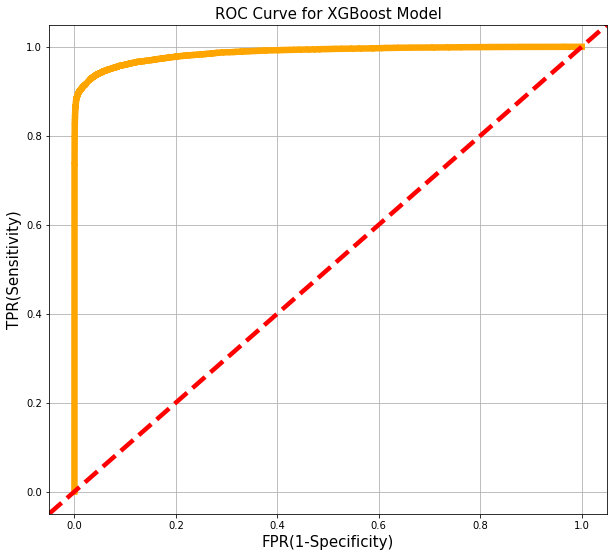

AUC Score for XGBoost Model for resampled test data : 
0.9861564517690254 

The Cross Entropy score of XGBoost Model :  1.8050531614357996 

Mean Score :  0.9481044004053688
Bias error :  5.18955995946312
Variance error :  0.1870198716707829 

---------------------------------------------------------------------------------------------------------------------------- 



In [195]:
def patient_survival_Prediction_XGBoostModel(fin_model):
        X_new=X[['map_apache', 'apache_4a_icu_death_prob', 'apache_2_diagnosis', 
                 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 
                 'bun_apache', 'creatinine_apache', 'wbc_apache', 
                 'gcs_verbal_apache', 'glucose_apache', 'diabetes_mellitus', 'resprate_apache']]
        Y=patient_records['hospital_death']
        smt=SMOTE(sampling_strategy=0.95,random_state=10)
        Xnew_res, Y_res = smt.fit_resample(X_new,Y)
        XRes_train,XRes_test,YRes_train,YRes_test=train_test_split(Xnew_res,Y_res,test_size=0.2,random_state=10)
        plt.figure(figsize=(10,9))
        Res_model=fin_model.fit(XRes_train,YRes_train)
        YRespred_train=Res_model.predict(XRes_train)
        YRespred_test=Res_model.predict(XRes_test)
        YRespred_test_prob=Res_model.predict_proba(XRes_test)
        print('Overall accuracy of XGBoost Model for resampled train data : ',
        np.round(accuracy_score(YRes_train,YRespred_train),2)*100)
        print('Overall accuracy of XGBoost Model for resampled test data : ',
        np.round(accuracy_score(YRes_test,YRespred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(YRes_test,YRespred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print('Confusion Matrix for XGBoost Model Model : ')
        print(confusion_mat,'\n')
        Sensitivity=((tp/(tp+fn))*100)
        print('Sensitivity : ',np.round(Sensitivity,2))
        Specificity=((tn/(tn+fp))*100)
        print('Specificity : ',np.round(Specificity,2),'\n')
        print('Classification report of XGBoost Model for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_train,YRespred_train),'\n')
        print('Classification report of XGBoost Model for resampled test data : ')
        print('----------------------------------------------------------------','\n')
        print(classification_report(YRes_test,YRespred_test),'\n')
        fpr,trp,th=roc_curve(YRes_test,YRespred_test_prob[:,1])
        plt.plot(fpr,trp,color='orange',linewidth=6.5)
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.title('ROC Curve for XGBoost Model',fontsize=15)
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--r',linewidth=4.5)
        plt.show()
        print('AUC Score for XGBoost Model for resampled test data : ')
        print(roc_auc_score(YRes_test,YRespred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(YRes_test,YRespred_test)
        print('The Cross Entropy score of XGBoost Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=fin_model,X=XRes_train,y=YRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
fin_model=XGBClassifier(eval_metric='logloss')
patient_survival_Prediction_XGBoostModel(fin_model)